# **IMPORT LIBRARIES**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:

import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# **LOAD DATASET**

In [5]:

file_path = "Delivery_Logistics_reconstructed.csv"

In [6]:
import os
print("Current directory:", os.getcwd())
print("\nFiles in current directory:")
print(os.listdir())


Current directory: d:\CHRISTSEM6\EY_INTERNSHIP\ETA-Delay-Prediction-Logistics

Files in current directory:
['.git', 'Delivery_Logistics_reconstructed.csv', 'ETA_Delay_Prediction (1).py', 'ETA_Delay_Prediction.ipynb', 'eta_feature_engineered_dataset.csv', 'FEATURE ENGINEERING SUMMARY.docx', 'README.md', 'requirements.txt']


In [7]:

df = pd.read_csv(file_path)

In [8]:

print("Dataset Loaded Successfully")
print("Shape of dataset:", df.shape)

Dataset Loaded Successfully
Shape of dataset: (25000, 25)


# **SCHEMA & STRUCTURE**

In [9]:
print("Column Names:\n")

for col in df.columns:
    print(col)


Column Names:

delivery_id
delivery_partner
package_type
vehicle_type
delivery_mode
region
weather_condition
distance_km
package_weight_kg
delayed
delivery_status
delivery_rating
delivery_cost
expected_time_hours_recon
speed_kmph_recon
weather_mult_recon
delivery_time_hours_recon
partner_mult_recon
delay_hours_recon
delayed_flag_recon
order_date_recon
order_ts_recon
delivery_ts_recon
expected_ts_recon
hour


In [10]:
print("Dataset Schema Information:")
df.info()

Dataset Schema Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   delivery_id                25000 non-null  float64
 1   delivery_partner           25000 non-null  object 
 2   package_type               25000 non-null  object 
 3   vehicle_type               25000 non-null  object 
 4   delivery_mode              25000 non-null  object 
 5   region                     25000 non-null  object 
 6   weather_condition          25000 non-null  object 
 7   distance_km                25000 non-null  float64
 8   package_weight_kg          25000 non-null  float64
 9   delayed                    25000 non-null  object 
 10  delivery_status            25000 non-null  object 
 11  delivery_rating            25000 non-null  int64  
 12  delivery_cost              25000 non-null  float64
 13  expected_time_hour

In [11]:
df.head()

,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delayed,delivery_status,delivery_rating,delivery_cost,expected_time_hours_recon,speed_kmph_recon,weather_mult_recon,delivery_time_hours_recon,partner_mult_recon,delay_hours_recon,delayed_flag_recon,order_date_recon,order_ts_recon,delivery_ts_recon,expected_ts_recon,hour
0,250.99,amazon logistics,automobile parts,ev bike,standard,west,clear,235.6,48.07,no,delivered,5,1322.21,52.8,30,1.0,9.332489,1.001906,-43.467511,0,21-10-2024,21-10-2024 13.00,2024-10-21 22:19:56.959673890,23-10-2024 17.48,13
1,250.99,amazon logistics,clothing,bike,express,central,stormy,81.8,45.51,yes,delayed,2,595.53,8.0,35,1.1,4.129935,1.001906,-3.870065,0,02-01-2024,02-01-2024 12.00,2024-01-02 16:07:47.764281093,02-01-2024 20.00,12
2,250.99,amazon logistics,clothing,van,same day,north,clear,282.9,31.33,yes,delayed,2,1608.49,26.4,45,1.0,7.427398,1.001906,-18.972602,0,31-05-2024,31-05-2024 11.00,2024-05-31 18:25:38.631406710,01-06-2024 13.24,11
3,250.99,amazon logistics,cosmetics,ev bike,two day,central,hot,88.6,8.67,no,delivered,3,469.01,48.0,30,1.1,3.997011,1.001906,-44.002989,0,03-01-2024,03-01-2024 17.00,2024-01-03 20:59:49.240153885,05-01-2024 17.00,17
4,250.99,amazon logistics,cosmetics,ev van,two day,east,rainy,204.2,8.09,no,delivered,4,1045.27,52.8,40,1.2,6.933351,1.001906,-45.866649,0,19-03-2024,19-03-2024 13.00,2024-03-19 19:56:00.063604276,21-03-2024 17.48,13


# **MISSING VALUES ANALYSIS**

In [12]:
# Calculate missing values count
missing_count = df.isnull().sum()

In [13]:
# Calculate missing percentage
missing_percentage = (missing_count / len(df)) * 100

In [14]:
# Missing values summary
missing_summary = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percentage': missing_percentage
}).sort_values(by='Missing_Percentage', ascending=False)

missing_summary

,Missing_Count,Missing_Percentage
delivery_id,0,0.0
expected_time_hours_recon,0,0.0
expected_ts_recon,0,0.0
delivery_ts_recon,0,0.0
order_ts_recon,0,0.0
order_date_recon,0,0.0
delayed_flag_recon,0,0.0
delay_hours_recon,0,0.0
partner_mult_recon,0,0.0
delivery_time_hours_recon,0,0.0


# **Duplicate Records Check**

In [15]:
# Total number of duplicate rows
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [16]:
# Percentage of duplicates
duplicate_percentage = (duplicate_count / len(df)) * 100
print(f"Percentage of duplicate rows: {duplicate_percentage:.2f}%")


Percentage of duplicate rows: 0.00%


# **NUMERICAL SUMMARY**

In [17]:
numeric_summary = df.describe().T
numeric_summary

,count,mean,std,min,25%,50%,75%,max
delivery_id,25000.0,12500.500000,7212.732314,250.990000,6250.750000,12500.500000,18750.250000,24750.010000
distance_km,25000.0,150.390436,86.409745,3.600000,75.900000,151.000000,224.900000,297.100000
package_weight_kg,25000.0,25.145898,14.368663,0.670000,12.680000,25.145000,37.660000,49.520000
delivery_rating,25000.0,3.666000,1.149964,1.000000,3.000000,4.000000,5.000000,5.000000
delivery_cost,25000.0,864.944579,435.712593,95.667400,490.800000,867.535000,1237.910000,1632.720600
expected_time_hours_recon,25000.0,33.053344,17.592341,8.000000,24.000000,26.400000,48.000000,52.800000
speed_kmph_recon,25000.0,39.976200,6.465300,30.000000,35.000000,40.000000,45.000000,50.000000
weather_mult_recon,25000.0,1.100310,0.064465,1.000000,1.050000,1.100000,1.150000,1.200000
delivery_time_hours_recon,25000.0,5.360406,2.631007,0.640518,3.180450,5.227587,7.307020,13.682192
partner_mult_recon,25000.0,0.999994,0.003666,0.993437,0.998812,1.000945,1.002187,1.005584


# **NUMERICAL DISTRIBUTIONS**

In [18]:
# Select only numeric columns from dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['delivery_id', 'distance_km', 'package_weight_kg', 'delivery_rating', 'delivery_cost',
       'expected_time_hours_recon', 'speed_kmph_recon', 'weather_mult_recon', 'delivery_time_hours_recon',
       'partner_mult_recon', 'delay_hours_recon', 'delayed_flag_recon', 'hour'],
      dtype='object')


In [19]:
numeric_features = [
    'distance_km',
    'package_weight_kg',
    'delivery_rating',
    'delivery_cost',
    'expected_time_hours_recon',
    'speed_kmph_recon',
    'delivery_time_hours_recon',
    'hour'
]

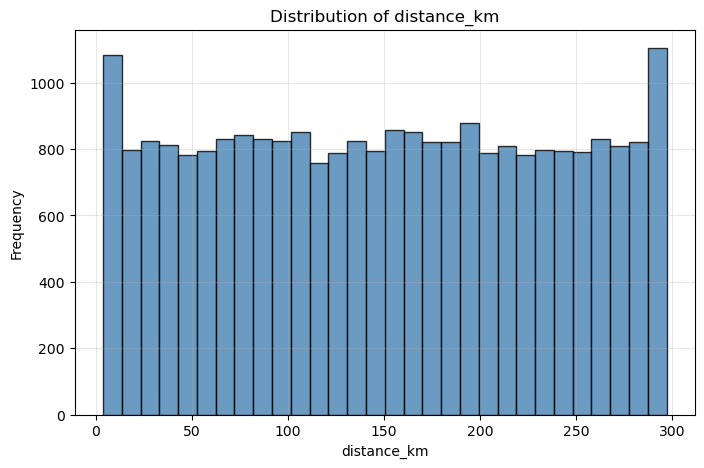

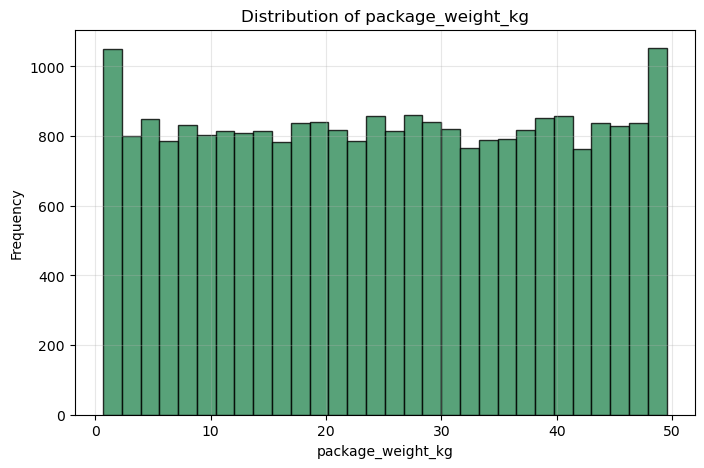

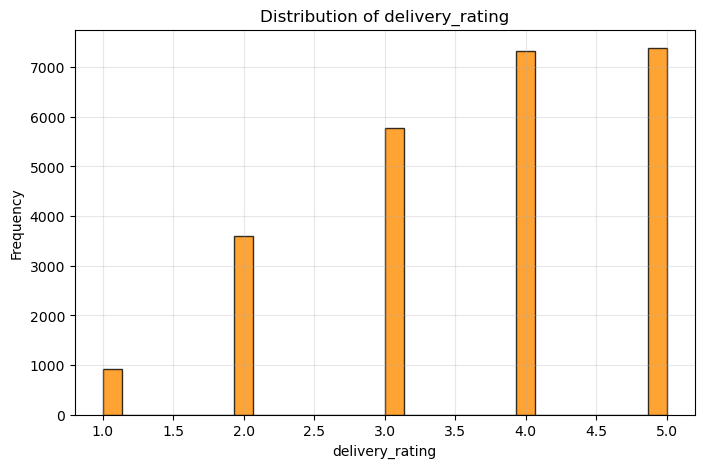

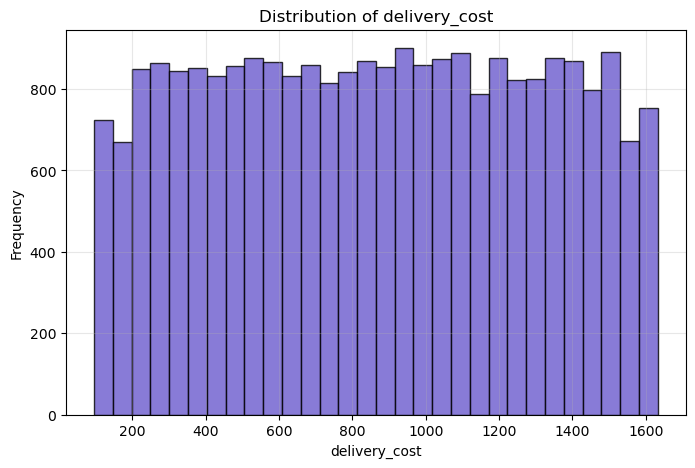

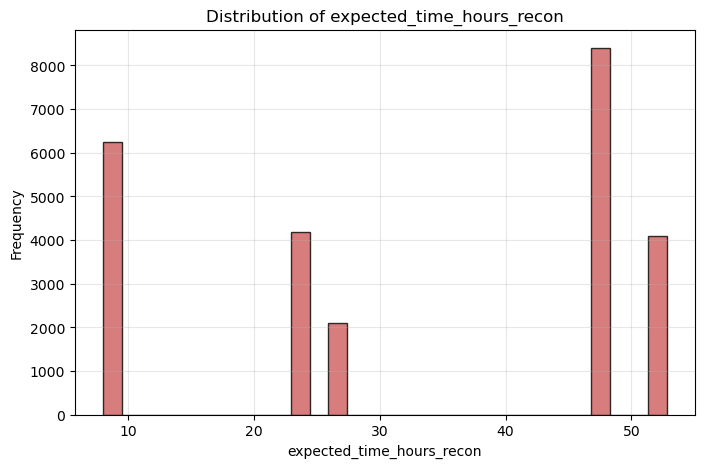

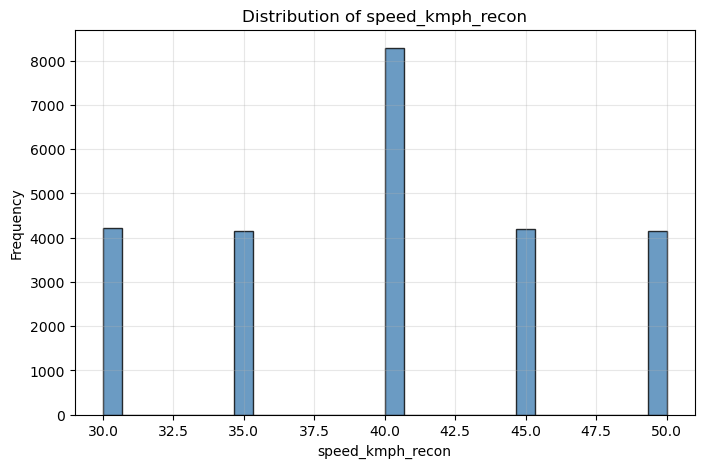

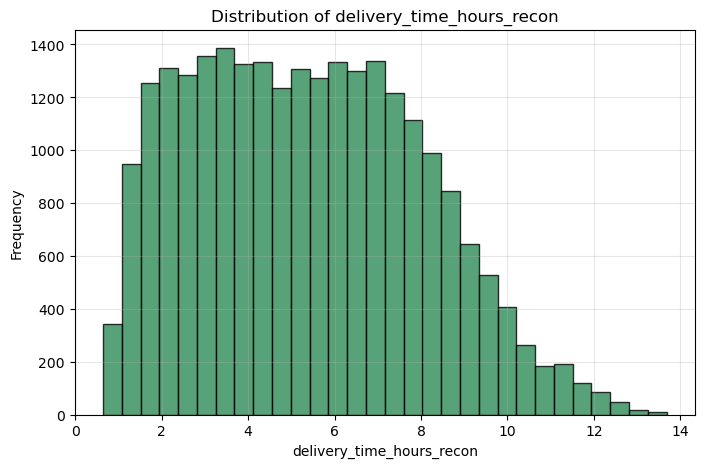

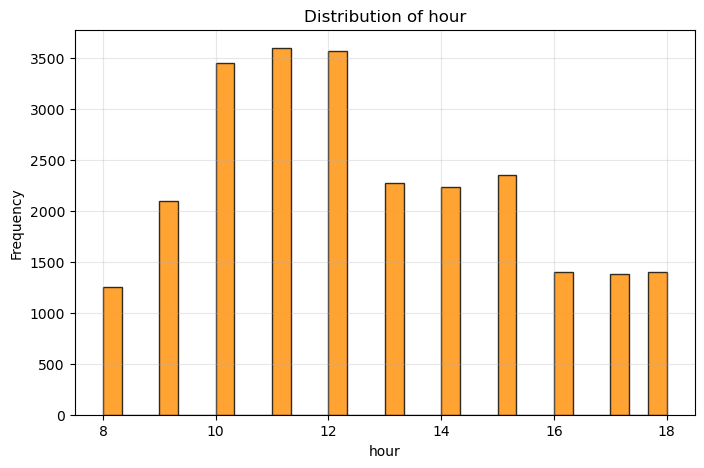

In [20]:
colors = ['steelblue', 'seagreen', 'darkorange', 'slateblue', 'indianred']

for i, col in enumerate(numeric_features):
    
    plt.figure(figsize=(8, 5))
    
    plt.hist(
        df[col],
        bins=30,
        color=colors[i % len(colors)],
        edgecolor='black',
        alpha=0.8
    )
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(alpha=0.3)
    
    plt.show()

# **CATEGORICAL SUMMARY**

In [21]:
#Percentage of total records belonging to each category.
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nColumn: {col}")
    print("Unique values:", df[col].nunique())
    print(df[col].value_counts(normalize=True).head(10) * 100)


Column: delivery_partner
Unique values: 9
delivery_partner
xpressbees          11.304
fedex               11.272
dhl                 11.208
ekart               11.204
blue dart           11.192
delhivery           11.144
shadowfax           10.944
ecom express        10.888
amazon logistics    10.844
Name: proportion, dtype: float64

Column: package_type
Unique values: 9
package_type
fragile items       11.392
pharmacy            11.240
documents           11.220
automobile parts    11.180
electronics         11.168
clothing            11.068
furniture           10.984
cosmetics           10.976
groceries           10.772
Name: proportion, dtype: float64

Column: vehicle_type
Unique values: 6
vehicle_type
ev bike    16.872
van        16.748
scooter    16.696
bike       16.640
truck      16.580
ev van     16.464
Name: proportion, dtype: float64

Column: delivery_mode
Unique values: 4
delivery_mode
two day     25.208
same day    25.116
express     24.932
standard    24.744
Name: proport

# **CATEGORICAL DISTRIBUTIONS**

In [21]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()

print("All categorical columns:\n")

for col in categorical_columns:
    print(col)

All categorical columns:

delivery_partner
package_type
vehicle_type
delivery_mode
region
weather_condition
delayed
delivery_status
order_date_recon
order_ts_recon
delivery_ts_recon
expected_ts_recon


In [22]:
# All categorical columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Date columns to exclude
date_columns = [
    'order_date_recon',
    'order_ts_recon',
    'delivery_ts_recon',
    'expected_ts_recon'
]

# Remove date columns
categorical_columns = [
    col for col in categorical_columns
    if col not in date_columns
]

print("Categorical columns used for plotting:\n")

for col in categorical_columns:
    print(col)

Categorical columns used for plotting:

delivery_partner
package_type
vehicle_type
delivery_mode
region
weather_condition
delayed
delivery_status


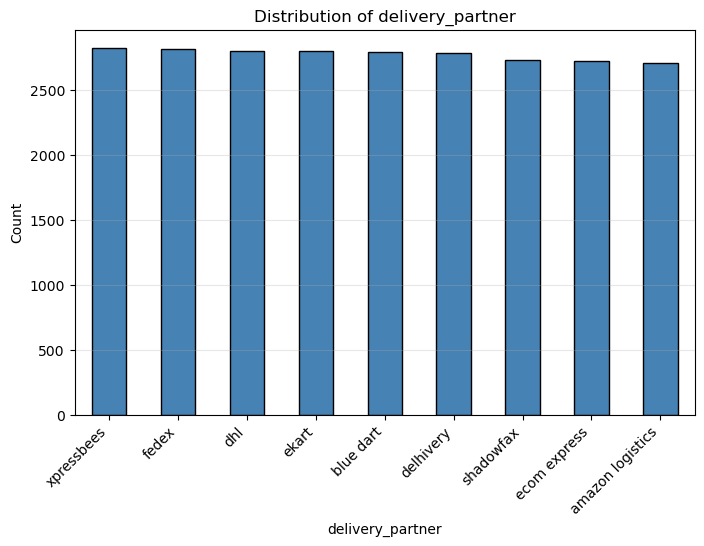

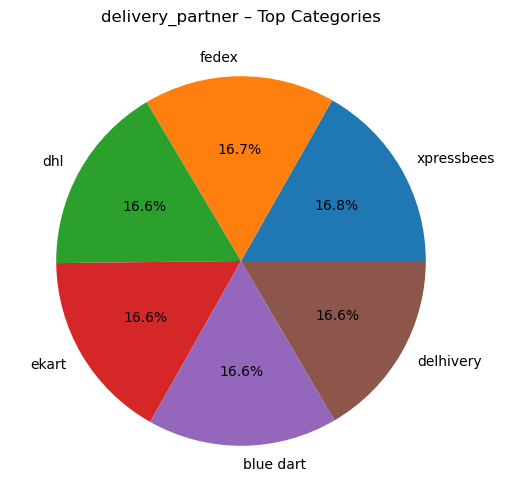

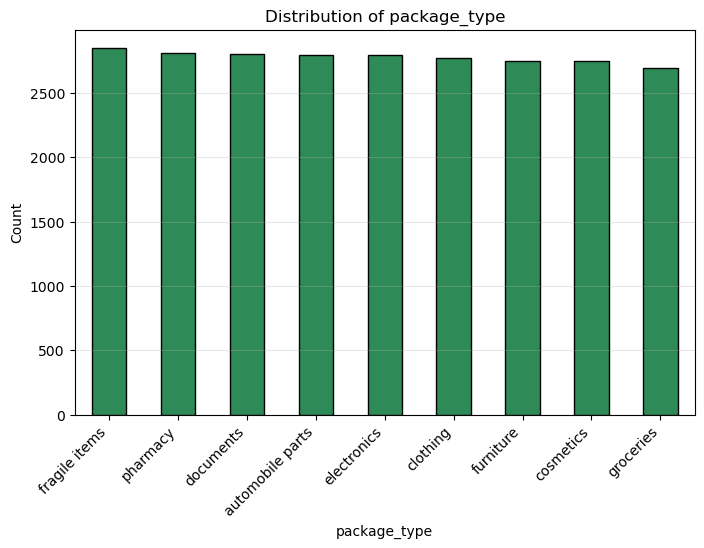

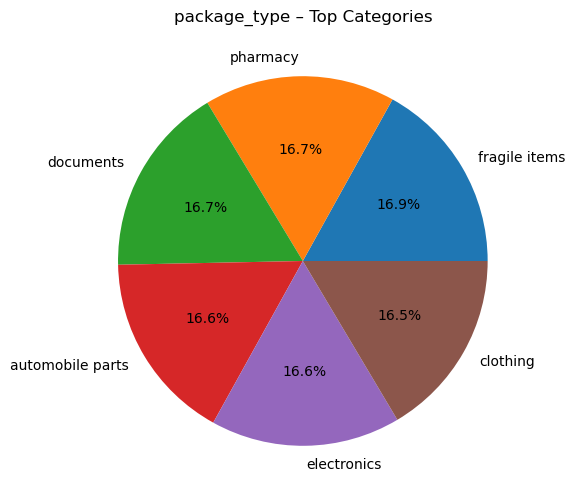

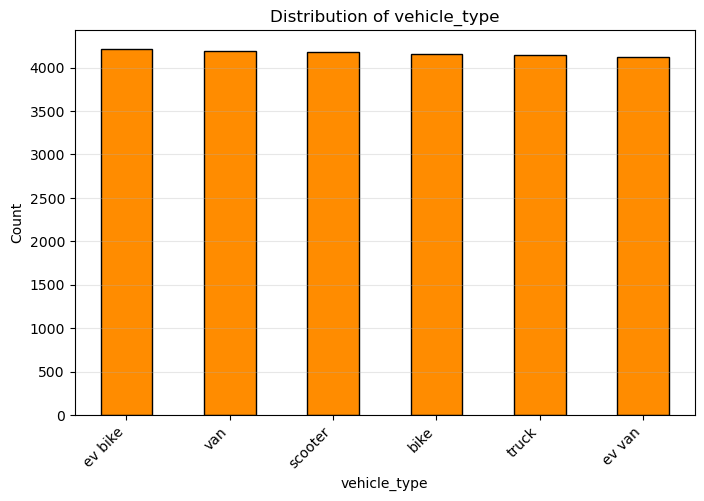

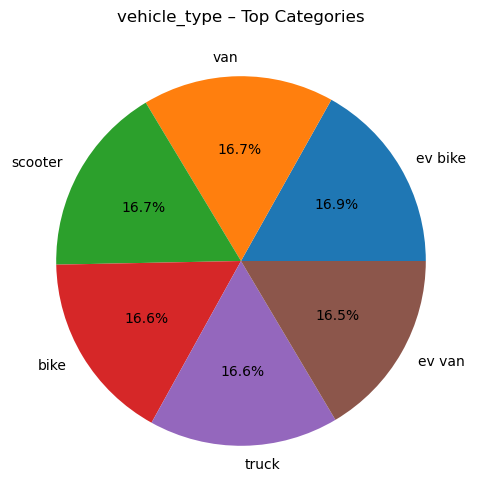

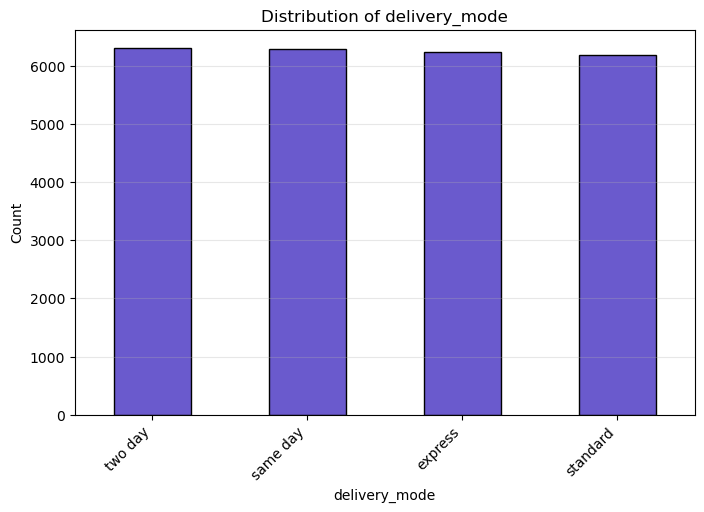

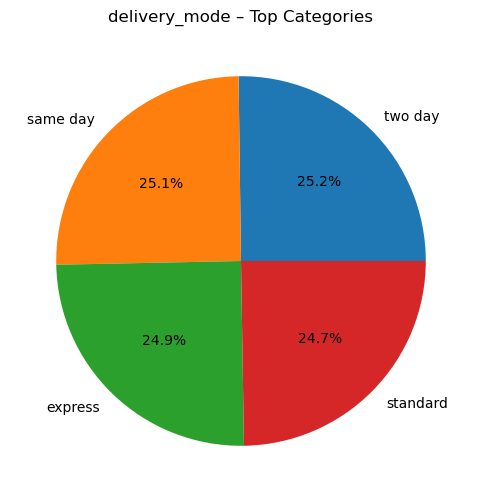

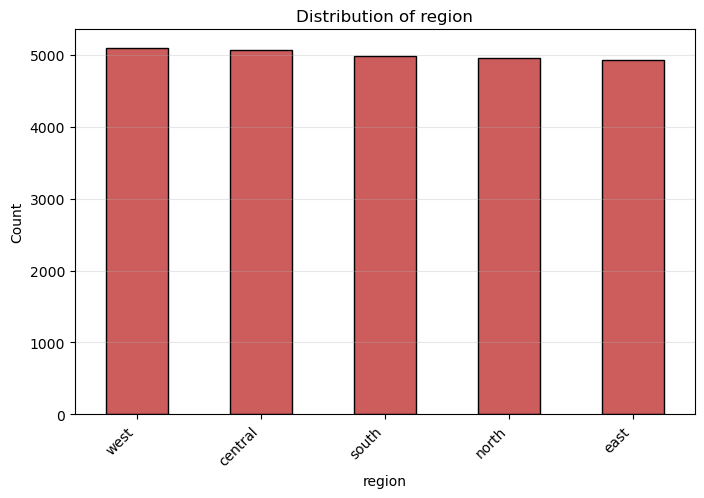

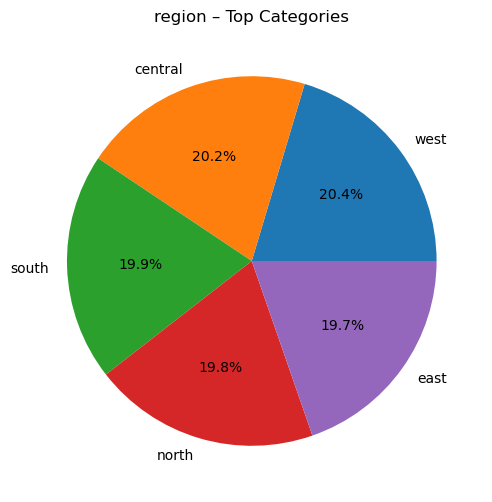

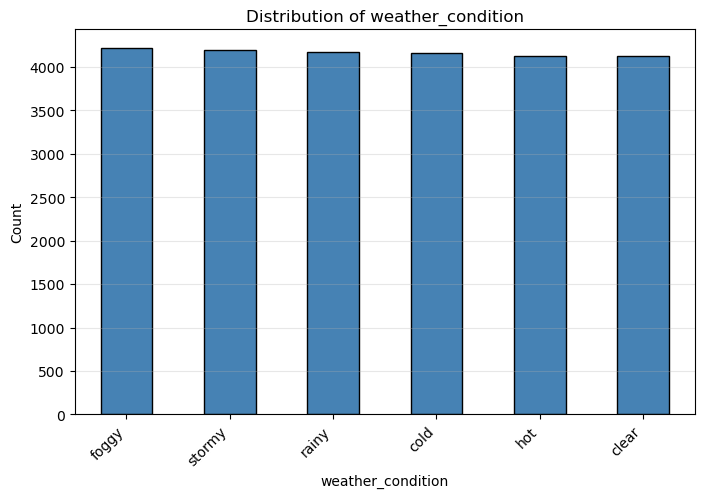

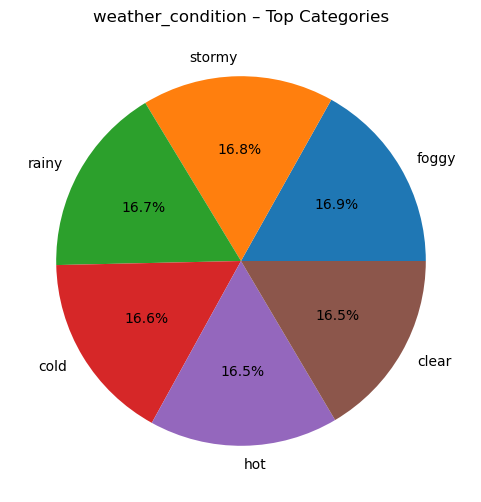

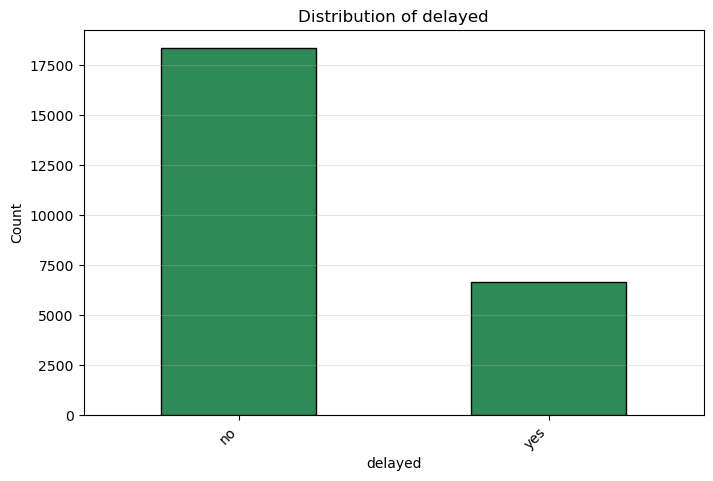

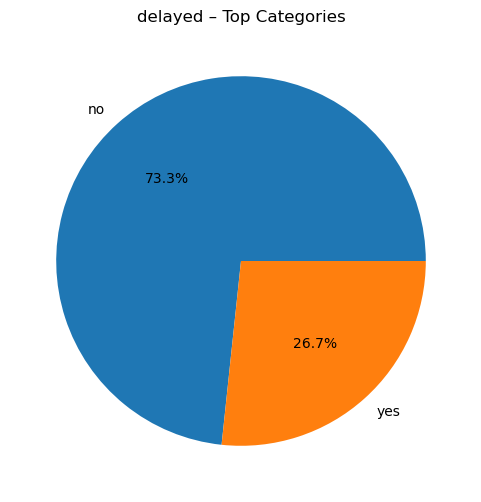

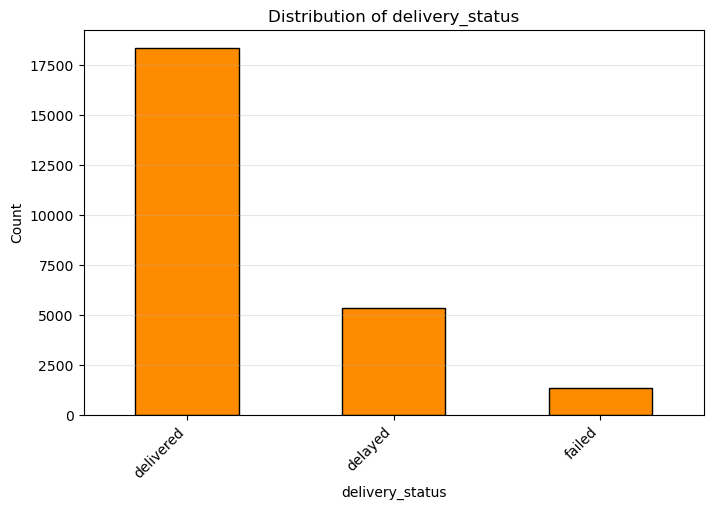

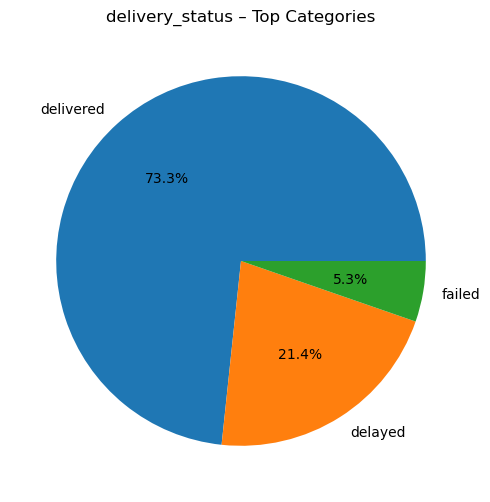

In [23]:
colors = ['steelblue', 'seagreen', 'darkorange', 'slateblue', 'indianred']

for i, col in enumerate(categorical_columns):

    value_counts = df[col].value_counts()

    # BAR CHART
    plt.figure(figsize=(8,5))
    
    value_counts.plot(
        kind='bar',
        color=colors[i % len(colors)],
        edgecolor='black'
    )
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    plt.show()

    # PIE CHART (Top 6 categories)
    plt.figure(figsize=(6,6))
    
    value_counts.head(6).plot(
        kind='pie',
        autopct='%1.1f%%'
    )
    
    plt.title(f'{col} – Top Categories')
    plt.ylabel('')
    
    plt.show()


# **WEATHER vs DELIVERY STATUS**

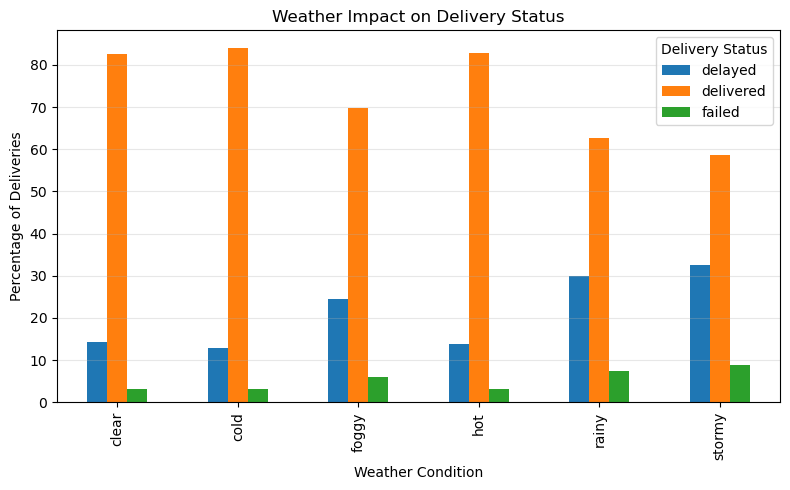

In [24]:
weather_delay = pd.crosstab(
    df['weather_condition'],
    df['delivery_status'],
    normalize='index'
) * 100

weather_delay.plot(kind='bar', figsize=(8, 5))
plt.title('Weather Impact on Delivery Status')
plt.xlabel('Weather Condition')
plt.ylabel('Percentage of Deliveries')
plt.legend(title='Delivery Status')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **REGION-WISE DELAY ANALYSIS**

region
central    27.252964
west       26.947988
south      26.783203
north      26.571024
east       25.797926
Name: delayed, dtype: float64


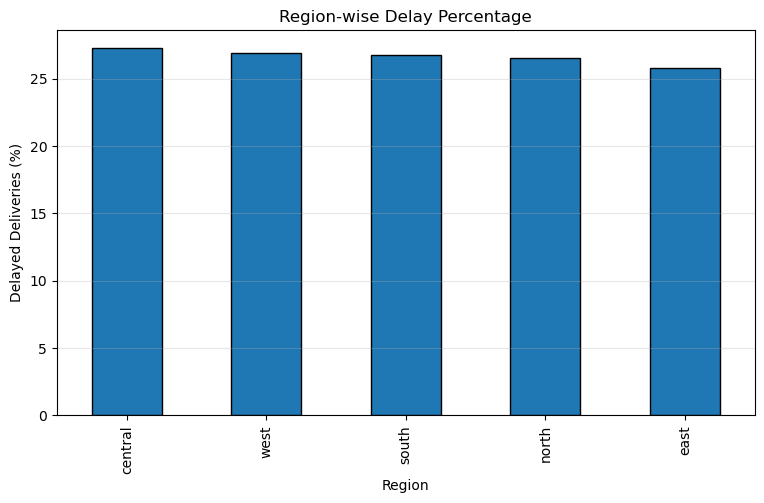

In [25]:
region_delay_pct = (
    df.groupby("region")["delayed"]
    .apply(lambda x: (x == "yes").mean() * 100)
    .sort_values(ascending=False)
)

print(region_delay_pct)


region_delay_pct.plot(kind="bar", figsize=(9,5), edgecolor="black")

plt.title("Region-wise Delay Percentage")
plt.xlabel("Region")
plt.ylabel("Delayed Deliveries (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()


# **VEHICLE TYPE vs DELAY**

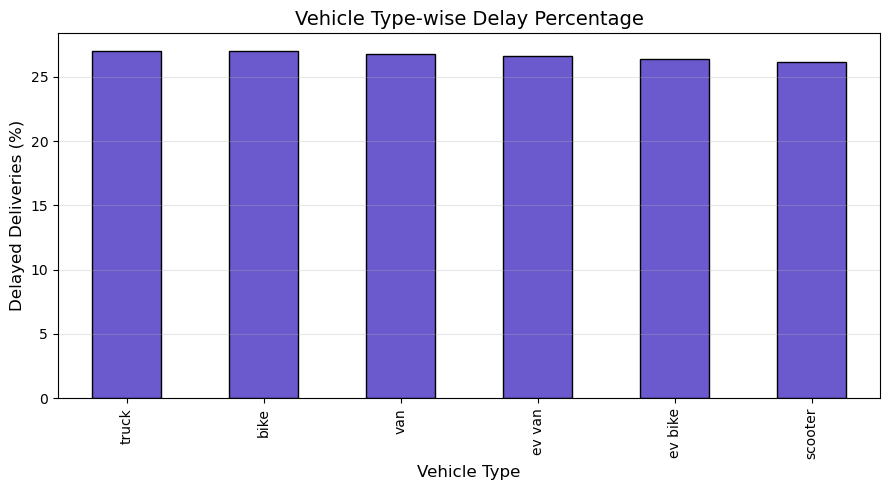

In [26]:
vehicle_delay = (
    df.groupby("vehicle_type")["delayed"]
    .apply(lambda x: (x == "yes").mean() * 100)
    .sort_values(ascending=False)
)

plt.figure(figsize=(9, 5))
vehicle_delay.plot(kind="bar", color="slateblue", edgecolor="black")
plt.title("Vehicle Type-wise Delay Percentage", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Delayed Deliveries (%)", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


# **DISTANCE vs DELAY**

<Figure size 700x500 with 0 Axes>

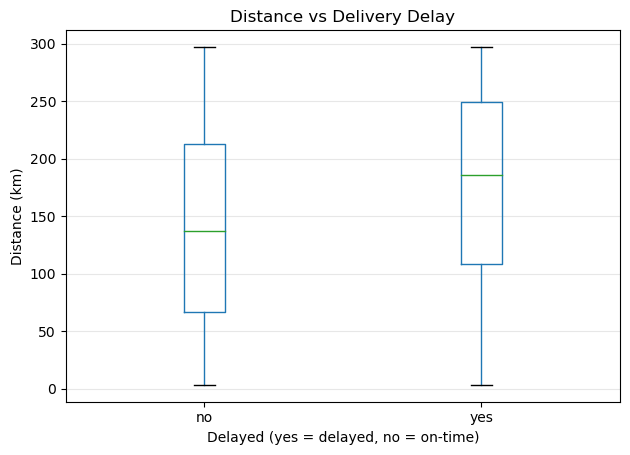

In [27]:
plt.figure(figsize=(7, 5))

df.boxplot(
    column='distance_km',
    by='delayed',
    grid=False
)

plt.title('Distance vs Delivery Delay')
plt.suptitle('')
plt.xlabel('Delayed (yes = delayed, no = on-time)')
plt.ylabel('Distance (km)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# **COLUMN-WISE OUTLIER DETECTION**

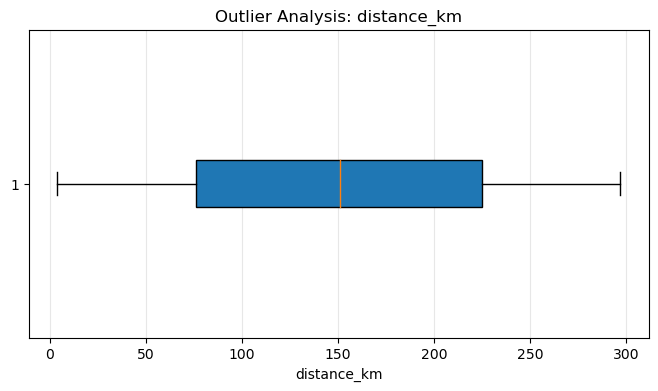

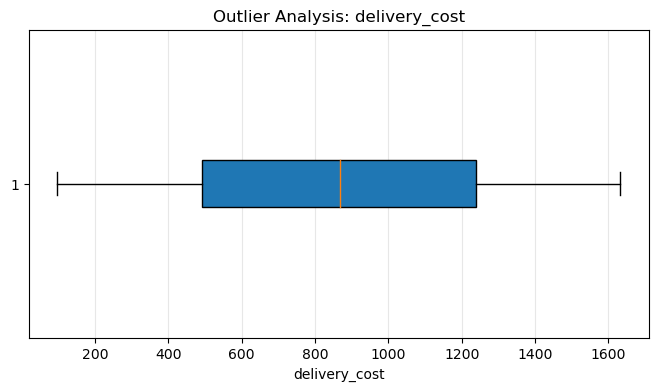

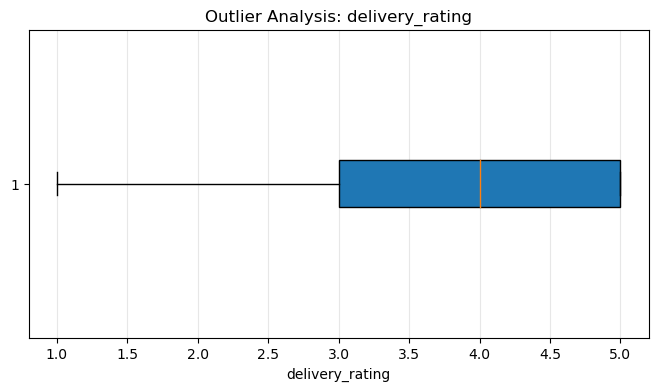

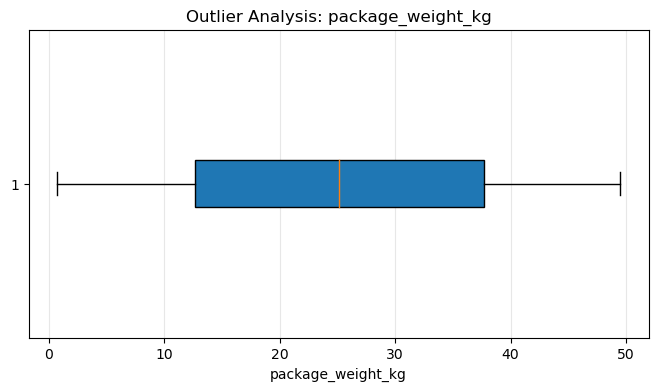

In [28]:
outlier_columns = [
    "distance_km",
    "delivery_cost",
    "delivery_rating",
    "package_weight_kg"
]

for col in outlier_columns:
    plt.figure(figsize=(8, 4))

    plt.boxplot(
        df[col],
        vert=False,
        patch_artist=True
    )

    plt.title(f"Outlier Analysis: {col}")
    plt.xlabel(col)
    plt.grid(axis="x", alpha=0.3)
    plt.show()


# **CORRELATION HEATMAP**

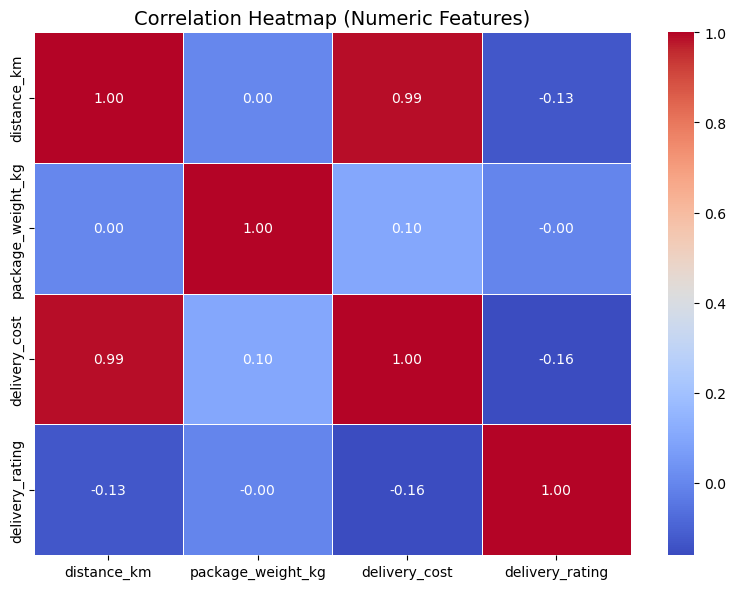

In [29]:
heatmap_columns = [
    'distance_km',
    'package_weight_kg',
    'delivery_cost',
    'delivery_rating'
]

corr_matrix = df[heatmap_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap (Numeric Features)", fontsize=14)
plt.tight_layout()
plt.show()


# **NUMERIC vs TARGET**

<Figure size 700x500 with 0 Axes>

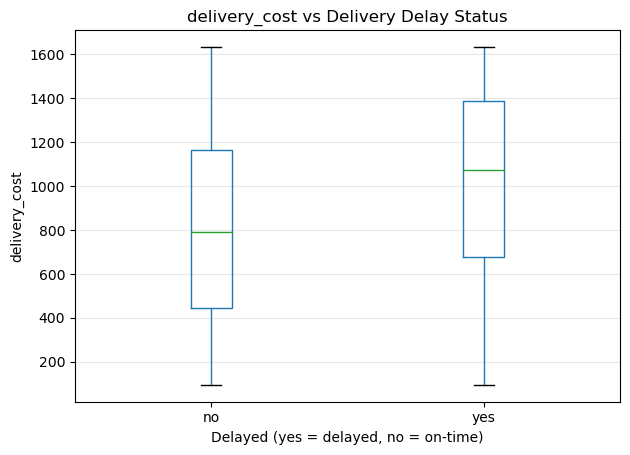

<Figure size 700x500 with 0 Axes>

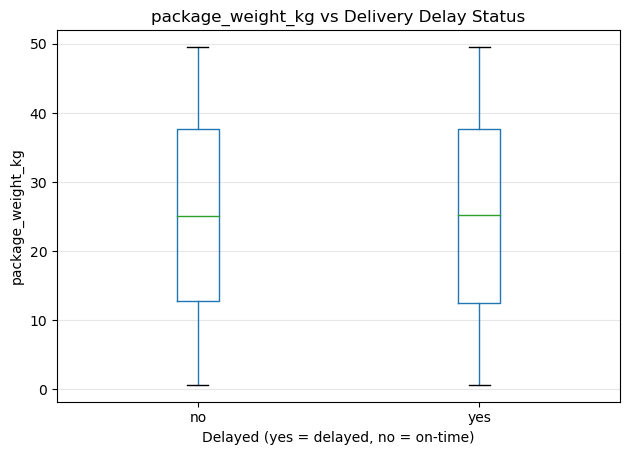

<Figure size 700x500 with 0 Axes>

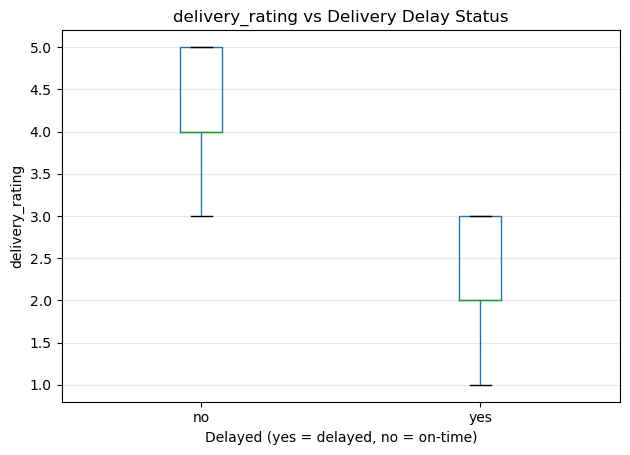

In [30]:
numeric_vs_target = [
    'delivery_cost',
    'package_weight_kg',
    'delivery_rating'
]

for col in numeric_vs_target:
    plt.figure(figsize=(7, 5))

    df.boxplot(
        column=col,
        by='delayed',   # existing column
        grid=False
    )

    plt.title(f'{col} vs Delivery Delay Status')
    plt.suptitle('')
    plt.xlabel('Delayed (yes = delayed, no = on-time)')
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


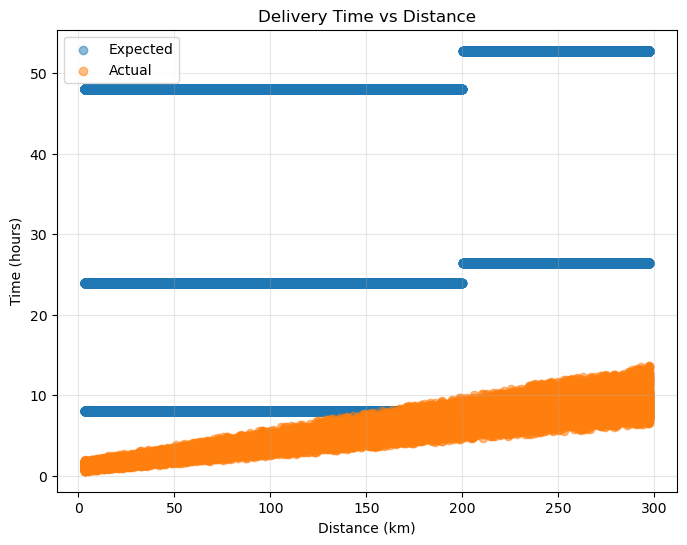

In [34]:
plt.figure(figsize=(8,6))

plt.scatter(df['distance_km'], df['expected_time_hours_recon'], label='Expected', alpha=0.5)
plt.scatter(df['distance_km'], df['delivery_time_hours_recon'], label='Actual', alpha=0.5)

plt.xlabel("Distance (km)")
plt.ylabel("Time (hours)")
plt.title("Delivery Time vs Distance")

plt.legend()
plt.grid(alpha=0.3)
plt.show()

Delay vs Distance

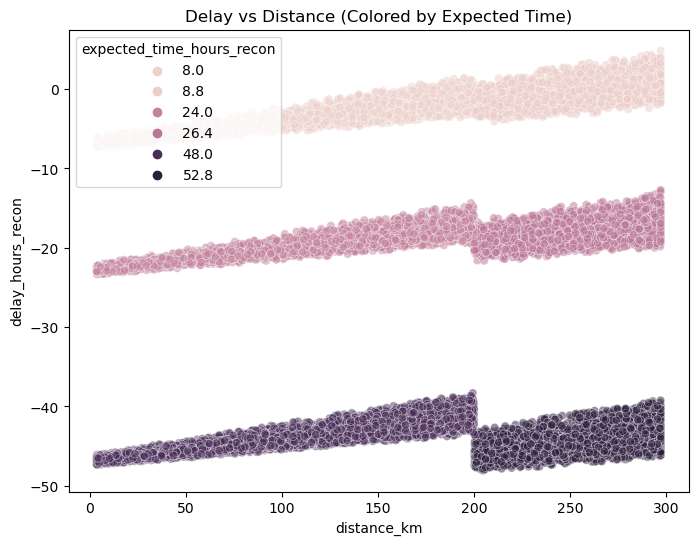

In [39]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x=df['distance_km'],
    y=df['delay_hours_recon'],
    hue=df['expected_time_hours_recon'],
    alpha=0.5
)

plt.title("Delay vs Distance (Colored by Expected Time)")
plt.show()

The delay vs distance plot shows three distinct bands corresponding to different expected delivery time categories. Most deliveries are completed earlier than expected, resulting in negative delay values. Distance has a moderate impact on delay, but expected delivery time is the dominant factor influencing delay distribution.

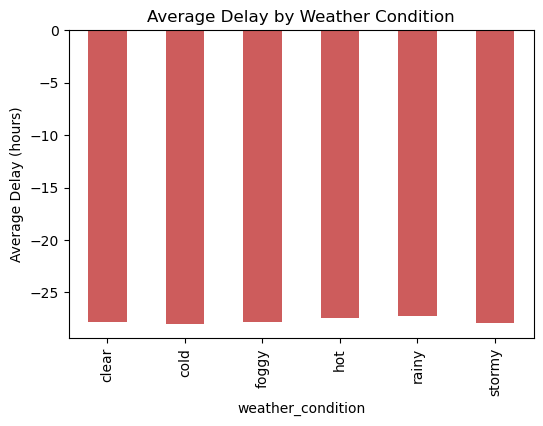

In [40]:
weather_delay = df.groupby('weather_condition')['delay_hours_recon'].mean()

plt.figure(figsize=(6,4))

weather_delay.plot(kind='bar', color='indianred')

plt.title("Average Delay by Weather Condition")
plt.ylabel("Average Delay (hours)")

plt.show()

# **Feature engineering**

In [106]:
df = pd.read_csv("Delivery_Logistics_reconstructed.csv")

In [107]:
df["order_ts_recon"] = pd.to_datetime(
    df["order_ts_recon"],
    format="%d-%m-%Y %H.%M"
)

df["expected_ts_recon"] = pd.to_datetime(
    df["expected_ts_recon"],
    format="%d-%m-%Y %H.%M"
)

df["delivery_ts_recon"] = pd.to_datetime(
    df["delivery_ts_recon"],
    errors="coerce"
)

In [108]:
print(df["order_ts_recon"].head())
print(df["order_ts_recon"].dtype)

0   2024-10-21 13:00:00
1   2024-01-02 12:00:00
2   2024-05-31 11:00:00
3   2024-01-03 17:00:00
4   2024-03-19 13:00:00
Name: order_ts_recon, dtype: datetime64[ns]
datetime64[ns]


**Time-Based Features**

In [109]:
# Extract day of week (0 = Monday, 6 = Sunday)
df["order_dayofweek"] = df["order_ts_recon"].dt.dayofweek

# Extract day name (Monday, Tuesday, etc.)
df["order_day_name"] = df["order_ts_recon"].dt.day_name()

# Extract month number (1 = January, 12 = December)
# Useful for seasonal analysis (festive rush, monsoon, etc.)
df["order_month"] = df["order_ts_recon"].dt.month

# Extract year (in case dataset spans multiple years)
df["order_year"] = df["order_ts_recon"].dt.year

# Extract hour of the day (0–23)
# Important for traffic and delivery timing patterns
df["order_hour"] = df["order_ts_recon"].dt.hour

**TRAFFIC / BEHAVIORAL FLAGS**

In [110]:
# Weekend flag
# 1 = Saturday or Sunday
# 0 = Weekday
df["is_weekend"] = (df["order_dayofweek"] >= 5).astype(int)


# Rush hour flag
# Morning rush: 8–10 AM
# Evening rush: 5–7 PM
# 1 = Rush hour, 0 = Normal hour
df["rush_hour_flag"] = df["order_hour"].isin(
    [8, 9, 10, 17, 18, 19]
).astype(int)


# Night delivery flag
# 1 = Between 10 PM–5 AM
# Night deliveries may be faster (less traffic) or riskier
df["night_delivery_flag"] = df["order_hour"].isin(
    list(range(0, 6)) + list(range(22, 24))
).astype(int)

In [111]:
df[[
    "order_ts_recon",
    "order_dayofweek",
    "order_day_name",
    "order_month",
    "order_year",
    "order_hour",
    "is_weekend",
    "rush_hour_flag",
    "night_delivery_flag"
]].head()

,order_ts_recon,order_dayofweek,order_day_name,order_month,order_year,order_hour,is_weekend,rush_hour_flag,night_delivery_flag
0,2024-10-21 13:00:00,0,Monday,10,2024,13,0,0,0
1,2024-01-02 12:00:00,1,Tuesday,1,2024,12,0,0,0
2,2024-05-31 11:00:00,4,Friday,5,2024,11,0,0,0
3,2024-01-03 17:00:00,2,Wednesday,1,2024,17,0,1,0
4,2024-03-19 13:00:00,1,Tuesday,3,2024,13,0,0,0


In [112]:
df["order_day_name"].value_counts()

order_day_name
Monday       3588
Tuesday      3588
Friday       3588
Wednesday    3588
Thursday     3588
Saturday     3541
Sunday       3519
Name: count, dtype: int64

In [113]:
df["is_weekend"].value_counts()

is_weekend
0    17940
1     7060
Name: count, dtype: int64

In [114]:
df["rush_hour_flag"].value_counts()

rush_hour_flag
0    15418
1     9582
Name: count, dtype: int64

In [115]:
df["night_delivery_flag"].value_counts()

night_delivery_flag
0    25000
Name: count, dtype: int64

In [116]:
df[[
    "order_dayofweek",
    "order_month",
    "order_hour"
]].describe()

,order_dayofweek,order_month,order_hour
count,25000.000000,25000.000000,25000.000000
mean,2.987960,6.457920,12.515400
std,1.996551,3.423971,2.751564
min,0.000000,1.000000,8.000000
25%,1.000000,3.000000,10.000000
50%,3.000000,6.000000,12.000000
75%,5.000000,9.000000,15.000000
max,6.000000,12.000000,18.000000


In [117]:
df.groupby("order_day_name")["delayed_flag_recon"].mean()

order_day_name
Friday       0.023690
Monday       0.033724
Saturday     0.031912
Sunday       0.031543
Thursday     0.030100
Tuesday      0.027871
Wednesday    0.027035
Name: delayed_flag_recon, dtype: float64

In [118]:
df.groupby("is_weekend")["delayed_flag_recon"].mean()

is_weekend
0    0.028484
1    0.031728
Name: delayed_flag_recon, dtype: float64

In [119]:
df.groupby("rush_hour_flag")["delayed_flag_recon"].mean()

rush_hour_flag
0    0.017771
1    0.048111
Name: delayed_flag_recon, dtype: float64

In [120]:
df.groupby("night_delivery_flag")["delayed_flag_recon"].mean()

night_delivery_flag
0    0.0294
Name: delayed_flag_recon, dtype: float64

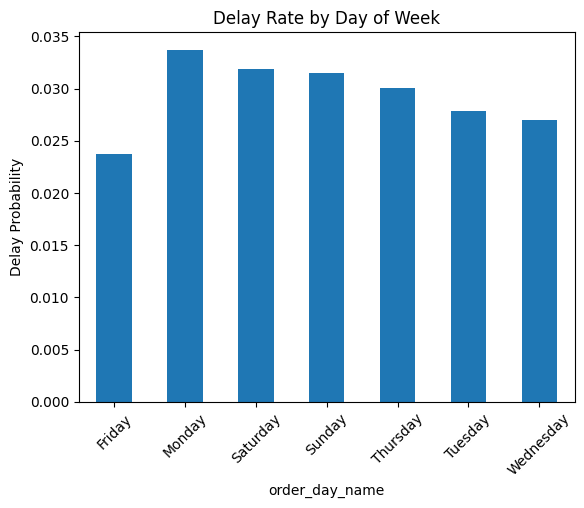

In [121]:
import matplotlib.pyplot as plt

df.groupby("order_day_name")["delayed_flag_recon"].mean().plot(kind="bar")
plt.title("Delay Rate by Day of Week")
plt.ylabel("Delay Probability")
plt.xticks(rotation=45)
plt.show()

**Delay Severity Features**

In [122]:
# -------------------------------
# DELAY SEVERITY CATEGORIZATION
# -------------------------------

def delay_bucket(x):
    if x <= 0:
        return "OnTime/Early"
    elif x <= 2:
        return "Slight Delay"
    elif x <= 6:
        return "Moderate Delay"
    else:
        return "Severe Delay"

# Create multi-class delay severity feature
df["delay_severity"] = df["delay_hours_recon"].apply(delay_bucket)

# Preview output
df[["delay_hours_recon", "delay_severity"]].head()

,delay_hours_recon,delay_severity
0,-43.467511,OnTime/Early
1,-3.870065,OnTime/Early
2,-18.972602,OnTime/Early
3,-44.002989,OnTime/Early
4,-45.866649,OnTime/Early


In [123]:
# -------------------------------
# SEVERE DELAY BINARY FLAG
# -------------------------------

# 1 = Delay more than 6 hours
# 0 = Otherwise
df["severe_delay_flag"] = (df["delay_hours_recon"] > 6).astype(int)

# Check distribution
df["severe_delay_flag"].value_counts()

severe_delay_flag
0    25000
Name: count, dtype: int64

**Distance + Time Efficiency Features**

In [124]:
# -------------------------------
# SPEED CATEGORY BINNING
# -------------------------------

df["speed_category"] = pd.cut(
    df["speed_kmph_recon"],
    bins=[0, 20, 40, 60, 100],
    labels=["Slow", "Medium", "Fast", "Very Fast"]
)

# Preview
df[["speed_kmph_recon", "speed_category"]].head()

,speed_kmph_recon,speed_category
0,30,Medium
1,35,Medium
2,45,Fast
3,30,Medium
4,40,Medium


In [125]:
# -------------------------------
# DELIVERY EFFICIENCY SCORE
# -------------------------------

# Higher speed and lower weather multiplier = better efficiency
df["efficiency_score"] = (
    df["speed_kmph_recon"] / df["weather_mult_recon"]
)

# Summary
df["efficiency_score"].describe()

count    25000.000000
mean        36.459488
std          6.296361
min         25.000000
25%         31.818182
50%         36.363636
75%         40.909091
max         50.000000
Name: efficiency_score, dtype: float64

**Cost & Profitability Features**

In [126]:
# -------------------------------
# COST PER KM
# -------------------------------

df["cost_per_km"] = df["delivery_cost"] / df["distance_km"]

df[["delivery_cost", "distance_km", "cost_per_km"]].head()

,delivery_cost,distance_km,cost_per_km
0,1322.21,235.6,5.612097
1,595.53,81.8,7.280318
2,1608.49,282.9,5.685719
3,469.01,88.6,5.293567
4,1045.27,204.2,5.118854


In [127]:
# -------------------------------
# COST PER KG
# -------------------------------

df["cost_per_kg"] = df["delivery_cost"] / df["package_weight_kg"]

df[["delivery_cost", "package_weight_kg", "cost_per_kg"]].head()

,delivery_cost,package_weight_kg,cost_per_kg
0,1322.21,48.07,27.505929
1,595.53,45.51,13.085695
2,1608.49,31.33,51.340249
3,469.01,8.67,54.095732
4,1045.27,8.09,129.205192


In [128]:
# -------------------------------
# HEAVY PACKAGE FLAG
# -------------------------------

# 1 = weight > 30kg
df["heavy_flag"] = (df["package_weight_kg"] > 30).astype(int)

df["heavy_flag"].value_counts()

heavy_flag
0    14997
1    10003
Name: count, dtype: int64

**Partner & Region Reliability Features**

In [129]:
# -------------------------------
# PARTNER HISTORICAL DELAY RATE
# -------------------------------

df["partner_delay_rate"] = df.groupby("delivery_partner")[
    "delayed_flag_recon"
].transform("mean")

# Preview
df[["delivery_partner", "partner_delay_rate"]].head()

,delivery_partner,partner_delay_rate
0,amazon logistics,0.028772
1,amazon logistics,0.028772
2,amazon logistics,0.028772
3,amazon logistics,0.028772
4,amazon logistics,0.028772


In [130]:
# -------------------------------
# REGION HISTORICAL DELAY RATE
# -------------------------------

df["region_delay_rate"] = df.groupby("region")[
    "delayed_flag_recon"
].transform("mean")

df[["region", "region_delay_rate"]].head()

,region,region_delay_rate
0,west,0.030226
1,central,0.031621
2,north,0.029905
3,central,0.031621
4,east,0.026225


In [131]:
# -------------------------------
# VEHICLE TYPE DELAY RATE
# -------------------------------

df["vehicle_delay_rate"] = df.groupby("vehicle_type")[
    "delayed_flag_recon"
].transform("mean")

df[["vehicle_type", "vehicle_delay_rate"]].head()

,vehicle_type,vehicle_delay_rate
0,ev bike,0.090564
1,bike,0.045192
2,van,0.002388
3,ev bike,0.090564
4,ev van,0.018707


In [132]:
# -------------------------------
# DELIVERY MODE DELAY RATE
# -------------------------------

df["mode_delay_rate"] = df.groupby("delivery_mode")[
    "delayed_flag_recon"
].transform("mean")

df[["delivery_mode", "mode_delay_rate"]].head()

,delivery_mode,mode_delay_rate
0,standard,0.000000
1,express,0.117921
2,same day,0.000000
3,two day,0.000000
4,two day,0.000000


**Weather-Based Risk Features**

In [133]:
# -------------------------------
# BAD WEATHER FLAG
# -------------------------------

# 1 = Risky weather conditions
# 0 = Normal weather
df["bad_weather_flag"] = df["weather_condition"].isin(
    ["rainy", "stormy", "foggy"]
).astype(int)

# Check distribution
df["bad_weather_flag"].value_counts()

bad_weather_flag
1    12588
0    12412
Name: count, dtype: int64

In [134]:
# -------------------------------
# WEATHER SEVERITY SCORE
# -------------------------------

# Assign severity scores manually
weather_map = {
    "clear": 0,
    "cloudy": 1,
    "hot": 1,
    "cold": 1,
    "rainy": 2,
    "foggy": 3,
    "stormy": 4
}

df["weather_severity"] = df["weather_condition"].map(weather_map)

# Preview
df[["weather_condition", "weather_severity"]].head()

,weather_condition,weather_severity
0,clear,0
1,stormy,4
2,clear,0
3,hot,1
4,rainy,2


In [135]:
# -------------------------------
# WEATHER DISTANCE RISK
# -------------------------------

# Long distance + bad weather = higher delay probability
df["weather_distance_risk"] = (
    df["weather_severity"] * df["distance_km"]
)

df[["weather_severity", "distance_km", "weather_distance_risk"]].head()

,weather_severity,distance_km,weather_distance_risk
0,0,235.6,0.0
1,4,81.8,327.2
2,0,282.9,0.0
3,1,88.6,88.6
4,2,204.2,408.4


**Delivery Status Feature**

In [136]:
# -------------------------------
# DELIVERY STATUS FLAG
# -------------------------------

# 1 = Delivered
# 0 = Otherwise
df["status_delivered_flag"] = (
    df["delivery_status"] == "delivered"
).astype(int)

df["status_delivered_flag"].value_counts()

status_delivered_flag
1    18331
0     6669
Name: count, dtype: int64

**Smart Interaction Features**

In [137]:
# -------------------------------
# LOAD INDEX
# -------------------------------

# Heavy + long distance = operational difficulty
df["load_index"] = (
    df["package_weight_kg"] * df["distance_km"]
)

df[["package_weight_kg", "distance_km", "load_index"]].head()

,package_weight_kg,distance_km,load_index
0,48.07,235.6,11325.292
1,45.51,81.8,3722.718
2,31.33,282.9,8863.257
3,8.67,88.6,768.162
4,8.09,204.2,1651.978


In [138]:
# -------------------------------
# COST WEATHER RISK
# -------------------------------

df["cost_weather_risk"] = (
    df["delivery_cost"] * df["weather_mult_recon"]
)

df[["delivery_cost", "weather_mult_recon", "cost_weather_risk"]].head()

,delivery_cost,weather_mult_recon,cost_weather_risk
0,1322.21,1.0,1322.210
1,595.53,1.1,655.083
2,1608.49,1.0,1608.490
3,469.01,1.1,515.911
4,1045.27,1.2,1254.324


In [139]:
# -------------------------------
# PARTNER WEATHER RISK
# -------------------------------

df["partner_weather_risk"] = (
    df["partner_delay_rate"] * df["weather_severity"]
)

df[[
    "partner_delay_rate",
    "weather_severity",
    "partner_weather_risk"
]].head()

,partner_delay_rate,weather_severity,partner_weather_risk
0,0.028772,0,0.000000
1,0.028772,4,0.115087
2,0.028772,0,0.000000
3,0.028772,1,0.028772
4,0.028772,2,0.057543


**Expected vs Actual Time Features**

In [140]:
# -------------------------------
# TIME RATIO FEATURE
# -------------------------------

# >1 means delayed
# <1 means early
df["time_ratio"] = (
    df["delivery_time_hours_recon"] /
    df["expected_time_hours_recon"]
)

df[[
    "delivery_time_hours_recon",
    "expected_time_hours_recon",
    "time_ratio"
]].head()

,delivery_time_hours_recon,expected_time_hours_recon,time_ratio
0,9.332489,52.8,0.176752
1,4.129935,8.0,0.516242
2,7.427398,26.4,0.281341
3,3.997011,48.0,0.083271
4,6.933351,52.8,0.131313


In [141]:
# -------------------------------
# EARLY DELIVERY FLAG
# -------------------------------

# 1 = Delivered earlier than expected
df["early_flag"] = (
    df["delay_hours_recon"] < 0
).astype(int)

df["early_flag"].value_counts()

early_flag
1    24265
0      735
Name: count, dtype: int64

In [142]:
# ----------------------------------------
# SAVE FULL FEATURE ENGINEERED DATASET
# ----------------------------------------

df.to_csv("eta_feature_engineered_dataset.csv", index=False)

print("Feature engineered dataset saved successfully!")
print("Total columns:", len(df.columns))

Feature engineered dataset saved successfully!
Total columns: 53


# **Model Building**

In [39]:
# Load the feature-engineered dataset
df_new = pd.read_csv("delivery_feature_engineered.csv")
print("Feature-engineered dataset loaded successfully!")
print("Shape:", df_new.shape)
df_new.head()

FileNotFoundError: [Errno 2] No such file or directory: 'delivery_feature_engineered.csv'

In [40]:
# Check all columns and data types
print("Columns in the dataset:")
print(df_new.columns.tolist())
print("\nData types:")
print(df_new.dtypes)

Columns in the dataset:


NameError: name 'df_new' is not defined

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the feature-engineered dataset
df = pd.read_csv("delivery_feature_engineered.csv")
print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

ModuleNotFoundError: No module named 'sklearn'

In [47]:
# Basic information
print(" Dataset Info:")
print(df.info())
print("\n Missing Values:")
print(df.isnull().sum())
print("\n Target Variable (delayed_flag) Distribution:")
print(df['delayed_flag'].value_counts())
print(f"\nDelay Rate: {df['delayed_flag'].mean()*100:.2f}%")

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   delivery_id          25000 non-null  float64
 1   delivery_partner     25000 non-null  object 
 2   package_type         25000 non-null  object 
 3   vehicle_type         25000 non-null  object 
 4   delivery_mode        25000 non-null  object 
 5   region               25000 non-null  object 
 6   weather_condition    25000 non-null  object 
 7   distance_km          25000 non-null  float64
 8   package_weight_kg    25000 non-null  float64
 9   delivery_time_hours  25000 non-null  object 
 10  expected_time_hours  25000 non-null  object 
 11  delayed              25000 non-null  object 
 12  delivery_status      25000 non-null  object 
 13  delivery_rating      25000 non-null  int64  
 14  delivery_cost        25000 non-null  float64
 15  delayed_flag         

In [48]:
# Drop columns that shouldn't be used for prediction
# 'delayed' and 'delivery_status' are related to the target, so we drop them
columns_to_drop = ['delayed_flag', 'delayed', 'delivery_status']

X = df.drop(columns_to_drop, axis=1)
y = df['delayed_flag']

print(f" Features shape: {X.shape}")
print(f" Target shape: {y.shape}")
print(f"\nFeatures being used: {X.columns.tolist()}")

 Features shape: (25000, 21)
 Target shape: (25000,)

Features being used: ['delivery_id', 'delivery_partner', 'package_type', 'vehicle_type', 'delivery_mode', 'region', 'weather_condition', 'distance_km', 'package_weight_kg', 'delivery_time_hours', 'expected_time_hours', 'delivery_rating', 'delivery_cost', 'bad_weather_flag', 'weather_severity', 'cost_per_km', 'weight_per_km', 'partner_delay_rate', 'region_delay_rate', 'vehicle_delay_rate', 'mode_delay_rate']


In [49]:
# Identify categorical columns (object type)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {categorical_cols}")

# Encode categorical variables
label_encoders = {}
X_encoded = X.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le
    print(f"   ✓ Encoded {col}: {len(le.classes_)} unique values")

print("\n All categorical variables encoded!")
X_encoded.head()

Categorical columns to encode: ['delivery_partner', 'package_type', 'vehicle_type', 'delivery_mode', 'region', 'weather_condition', 'delivery_time_hours', 'expected_time_hours']
   ✓ Encoded delivery_partner: 9 unique values
   ✓ Encoded package_type: 9 unique values
   ✓ Encoded vehicle_type: 6 unique values
   ✓ Encoded delivery_mode: 4 unique values
   ✓ Encoded region: 5 unique values
   ✓ Encoded weather_condition: 6 unique values
   ✓ Encoded delivery_time_hours: 20 unique values
   ✓ Encoded expected_time_hours: 9 unique values

 All categorical variables encoded!


,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delivery_time_hours,expected_time_hours,delivery_rating,delivery_cost,bad_weather_flag,weather_severity,cost_per_km,weight_per_km,partner_delay_rate,region_delay_rate,vehicle_delay_rate,mode_delay_rate
0,250.99,2,0,0,1,4,0,297.0,46.96,8,6,3,1632.7206,0,0,5.497376,0.158114,0.248026,0.269480,0.270433,0.325370
1,250.99,8,2,2,0,0,1,89.6,47.39,2,1,5,640.1700,0,1,7.144754,0.528906,0.282732,0.272530,0.266278,0.737847
2,250.99,7,7,4,3,1,4,273.5,26.89,10,7,4,1448.1700,1,2,5.294954,0.098318,0.273026,0.257979,0.270446,0.004284
3,250.99,3,4,2,1,1,1,269.7,12.69,6,6,3,1486.5700,0,1,5.511939,0.047052,0.263383,0.257979,0.266278,0.325370
4,250.99,3,1,5,3,2,2,256.7,37.02,9,7,4,1394.5600,1,3,5.432645,0.144215,0.263383,0.265710,0.267733,0.004284


In [50]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.2,       # 20% for testing
    random_state=42,     # For reproducibility
    stratify=y           # Keep same proportion of delayed/not delayed
)

print(" Data split completed!")
print(f"\n Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

print(f"\nTraining target distribution:")
print(y_train.value_counts())
print(f"   Delay rate: {y_train.mean()*100:.2f}%")

print(f"\nTesting target distribution:")
print(y_test.value_counts())
print(f"   Delay rate: {y_test.mean()*100:.2f}%")

 Data split completed!

 Training set: 20000 samples (80.0%)
Testing set: 5000 samples (20.0%)

Training target distribution:
delayed_flag
0    14665
1     5335
Name: count, dtype: int64
   Delay rate: 26.67%

Testing target distribution:
delayed_flag
0    3666
1    1334
Name: count, dtype: int64
   Delay rate: 26.68%


In [51]:
# Scale the features (standardization: mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Features scaled successfully!")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")
print(f"\nScaling example (first feature):")
print(f"   Before: mean={X_train.iloc[:, 0].mean():.2f}, std={X_train.iloc[:, 0].std():.2f}")
print(f"   After: mean={X_train_scaled[:, 0].mean():.2f}, std={X_train_scaled[:, 0].std():.2f}")

 Features scaled successfully!
Training data shape: (20000, 21)
Testing data shape: (5000, 21)

Scaling example (first feature):
   Before: mean=12492.03, std=7214.74
   After: mean=0.00, std=1.00


In [42]:
drop_cols = [
    "delivery_id",
    "delay_hours",
    "delayed_flag",
    "expected_time_hours",
    "actual_time_hours"
]

X = df.drop(columns=drop_cols)
y = df["delay_hours"]

print("Features:", X.columns)


KeyError: "['delay_hours', 'actual_time_hours'] not found in axis"

Create Synthetic delay_hours (Since Dataset Has No Real Duration)

In [43]:
# Create synthetic delay based on weather + vehicle + noise

vehicle_speed = {
    "bike": 40,
    "ev bike": 38,
    "scooter": 35,
    "van": 30,
    "ev van": 28,
    "truck": 25
}

df["base_speed"] = df["vehicle_type"].str.lower().map(vehicle_speed).fillna(30)

df["expected_time_hours"] = df["distance_km"] / df["base_speed"]

weather_impact = {
    "clear": 0.00,
    "hot": 0.05,
    "cold": 0.08,
    "foggy": 0.12,
    "rainy": 0.18,
    "stormy": 0.30
}

df["weather_delay_factor"] = (
    df["weather_condition"].str.lower().map(weather_impact).fillna(0)
)

np.random.seed(42)

df["operational_noise"] = np.random.normal(0, 0.3, len(df))

df["actual_time_hours"] = (
    df["expected_time_hours"] *
    (1 + df["weather_delay_factor"])
    + df["operational_noise"]
)

df["delay_hours"] = df["actual_time_hours"] - df["expected_time_hours"]

print(df["delay_hours"].describe())


count    25000.000000
mean         0.576845
std          0.706967
min         -1.090560
25%          0.090371
50%          0.433243
75%          0.894003
max          4.037312
Name: delay_hours, dtype: float64


Prepare Data for Regression

In [45]:
# Drop leakage columns
drop_cols = [
    "delay_hours",
    "delayed_flag",
    "delayed",
    "delivery_status",
    "expected_time_hours",
    "actual_time_hours",
    "base_speed",
    "weather_delay_factor",
    "operational_noise"
]

X = df.drop(columns=drop_cols)
y = df["delay_hours"]


Encode Categorical Features

In [46]:
X_encoded = pd.get_dummies(X, drop_first=True)


Train-Test Split

In [51]:
pip install scikit-learn


  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 4.6 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42
)


Train Regression Model

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


MAE: 0.2455159449705321
RMSE: 0.3087132166893994
R2: 0.806129110077896


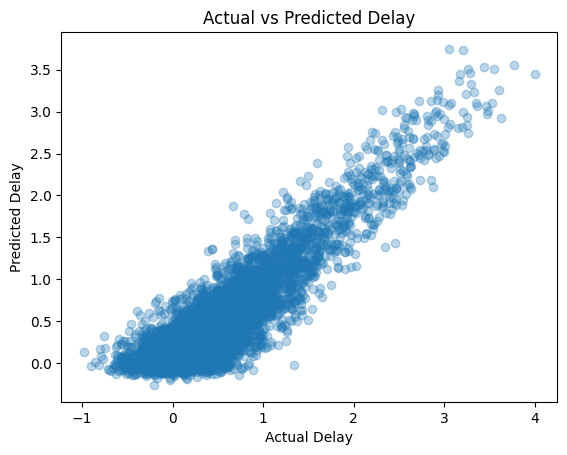

In [54]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.title("Actual vs Predicted Delay")
plt.show()


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


Define Parameter Grid

In [56]:
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

Wrap Your Pipeline

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Identify feature types
numeric_features = X.select_dtypes(include="number").columns
categorical_features = X.select_dtypes(exclude="number").columns

# Build preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numeric_features),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_features)
])


In [59]:
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])


In [75]:
drop_cols = [
    "delivery_id",
    "delay_hours",
    "delayed_flag",
    "expected_time_hours",
    "actual_time_hours",
    "base_speed",
    "weather_delay_factor",
    "operational_noise",
    "delivery_time_hours"
]

X = df.drop(columns=[c for c in drop_cols if c in df.columns])
y = df["delay_hours"]


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_features = X_train.select_dtypes(include="number").columns
categorical_features = X_train.select_dtypes(exclude="number").columns

preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numeric_features),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_features)
])


In [78]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])


In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [80]:
best_model = grid_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Tuned MAE:", mean_absolute_error(y_test, y_pred_tuned))
print("Tuned RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tuned)))
print("Tuned R2:", r2_score(y_test, y_pred_tuned))


Tuned MAE: 0.23984070892158338
Tuned RMSE: 0.3018987034746219
Tuned R2: 0.8145936288824389


In [73]:
print(X.columns)


Index(['delivery_partner', 'package_type', 'vehicle_type', 'delivery_mode', 'region', 'weather_condition',
       'distance_km', 'package_weight_kg', 'delivery_time_hours', 'delayed', 'delivery_status', 'delivery_rating',
       'delivery_cost', 'bad_weather_flag', 'weather_severity', 'cost_per_km', 'weight_per_km', 'base_speed',
       'weather_delay_factor', 'operational_noise'],
      dtype='object')


In [74]:
[col for col in X.columns if "delay" in col]


['delayed', 'weather_delay_factor']

After hyperparameter tuning using GridSearchCV, the Random Forest model achieved an R² of 0.815, improving upon the baseline model. The average prediction error was approximately 14 minutes.

Model Comparison

Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression R2:", lr_r2)


Linear Regression R2: 0.6574588485355857


Gradient Boosting Regressor

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

gb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

gb_pipeline.fit(X_train, y_train)

y_pred_gb = gb_pipeline.predict(X_test)

gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
gb_r2 = r2_score(y_test, y_pred_gb)

print("Gradient Boosting R2:", gb_r2)


Gradient Boosting R2: 0.8177144731253124


In [84]:
rf_mae = mean_absolute_error(y_test, y_pred_tuned)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
rf_r2 = r2_score(y_test, y_pred_tuned)


In [85]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Gradient Boosting",
        "Random Forest (Tuned)"
    ],
    "MAE": [
        lr_mae,
        gb_mae,
        rf_mae
    ],
    "RMSE": [
        lr_rmse,
        gb_rmse,
        rf_rmse
    ],
    "R2": [
        lr_r2,
        gb_r2,
        rf_r2
    ]
})

results.sort_values(by="R2", ascending=False)


,Model,MAE,RMSE,R2
1,Gradient Boosting,0.238083,0.299347,0.817714
2,Random Forest (Tuned),0.239841,0.301899,0.814594
0,Linear Regression,0.317457,0.410351,0.657459


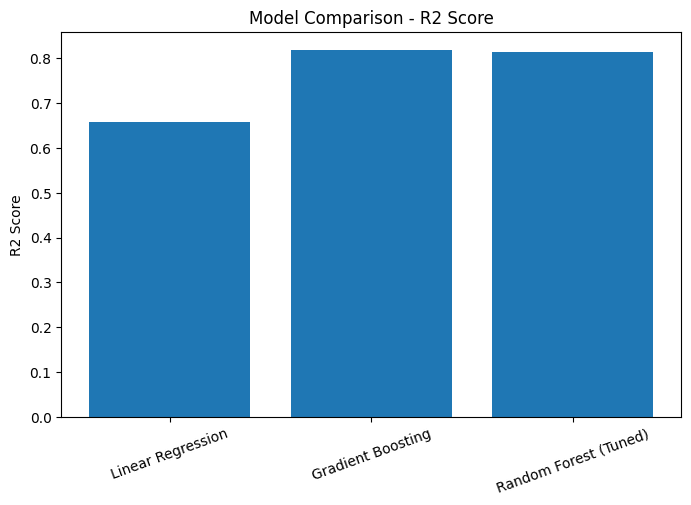

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["R2"])
plt.title("Model Comparison - R2 Score")
plt.ylabel("R2 Score")
plt.xticks(rotation=20)
plt.show()


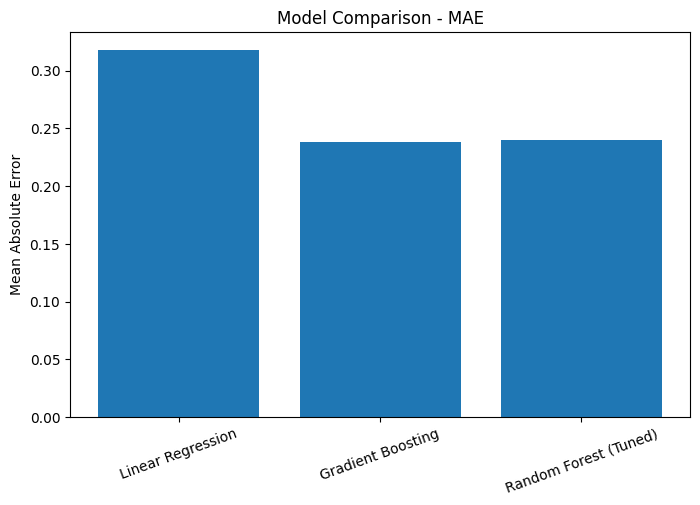

In [89]:
plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["MAE"])
plt.title("Model Comparison - MAE")
plt.ylabel("Mean Absolute Error")
plt.xticks(rotation=20)
plt.show()
#Lower is better


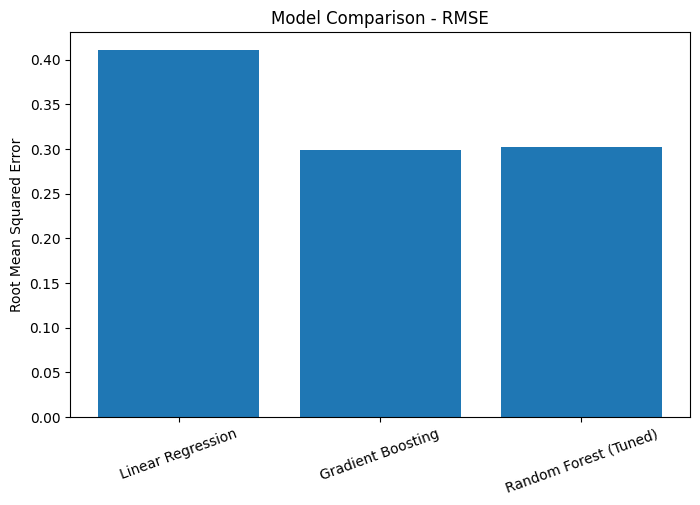

In [90]:
plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["RMSE"])
plt.title("Model Comparison - RMSE")
plt.ylabel("Root Mean Squared Error")
plt.xticks(rotation=20)
plt.show()


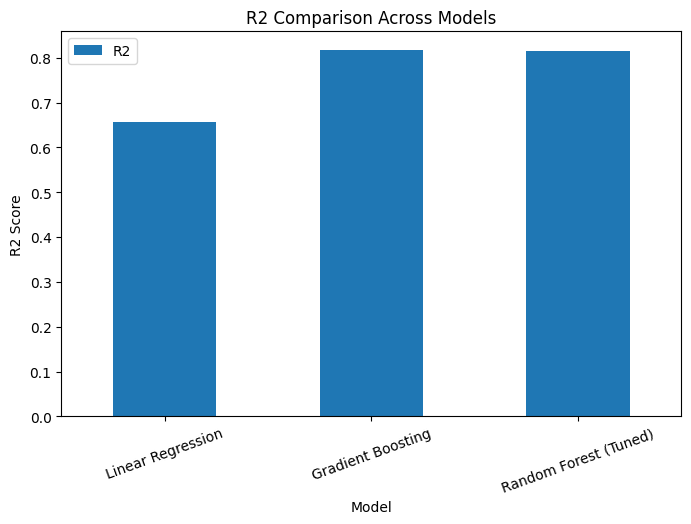

In [91]:
results.set_index("Model")[["R2"]].plot(
    kind="bar",
    figsize=(8,5),
    title="R2 Comparison Across Models"
)
plt.ylabel("R2 Score")
plt.xticks(rotation=20)
plt.show()


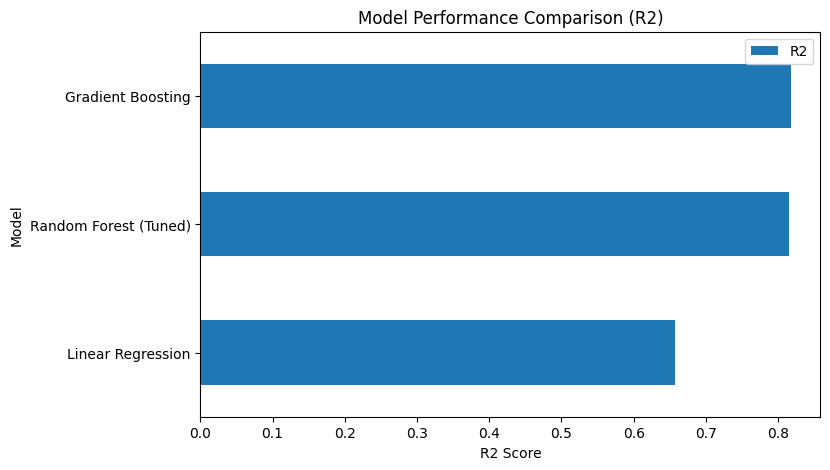

In [92]:
results.sort_values("R2").plot(
    x="Model",
    y="R2",
    kind="barh",
    figsize=(8,5),
    title="Model Performance Comparison (R2)"
)
plt.xlabel("R2 Score")
plt.show()


Random Forest outperformed other models with the highest R² and lowest MAE, indicating better generalization and non-linear learning capability.

In [93]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [94]:
from xgboost import XGBRegressor


In [95]:
xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])


In [96]:
xgb_pipeline.fit(X_train, y_train)

y_pred_xgb = xgb_pipeline.predict(X_test)


In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost MAE:", xgb_mae)
print("XGBoost RMSE:", xgb_rmse)
print("XGBoost R2:", xgb_r2)


XGBoost MAE: 0.2393920150919175
XGBoost RMSE: 0.30071998264740446
XGBoost R2: 0.8160385884981016


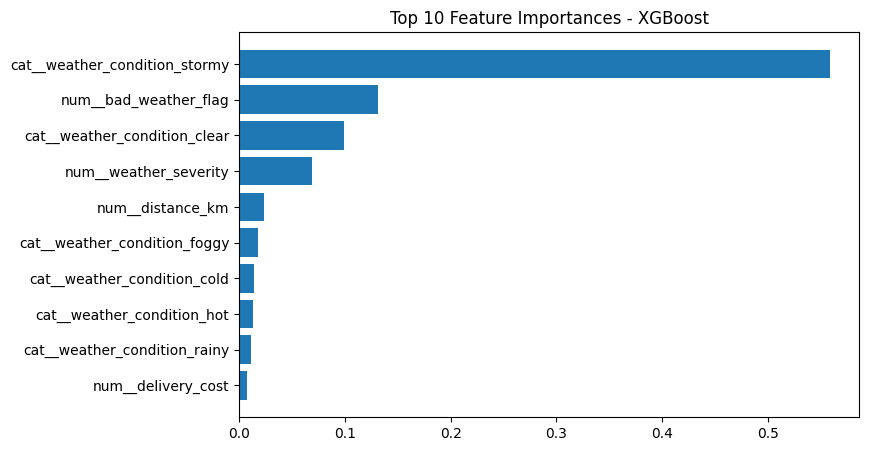

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names after preprocessing
feature_names = xgb_pipeline.named_steps["preprocessor"].get_feature_names_out()

# Get importances
importances = xgb_pipeline.named_steps["model"].feature_importances_

# Sort top 10
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()


Feature importance analysis shows that weather conditions, especially stormy weather, are the strongest drivers of delivery delay. This indicates environmental factors have greater influence than operational factors like distance.

✅ Dataset loaded! Shape: (25000, 24)

✅ Features being used (11):
['delivery_partner', 'package_type', 'vehicle_type', 'delivery_mode', 'region', 'weather_condition', 'distance_km', 'package_weight_kg', 'delivery_cost', 'bad_weather_flag', 'weather_severity']

🎯 Target distribution:
delayed_flag
0    18331
1     6669
Name: count, dtype: int64
Delay rate: 26.68%

📝 Encoding: ['delivery_partner', 'package_type', 'vehicle_type', 'delivery_mode', 'region', 'weather_condition']
✅ Encoding done!

✅ Split done!
   Training: 20000 samples
   Testing:  5000 samples

✅ Features scaled!

🌲 Training Random Forest...
✅ Random Forest done!

📈 Training Logistic Regression...
✅ Logistic Regression done!

🌳 Training Decision Tree...
✅ Decision Tree done!

👥 Training KNN...
✅ KNN done!

✅ All predictions done!

🌲 RANDOM FOREST
Accuracy: 89.66% | ROC-AUC: 0.9670
              precision    recall  f1-score   support

 Not Delayed       0.93      0.93      0.93      3666
     Delayed       0.81      0.81  

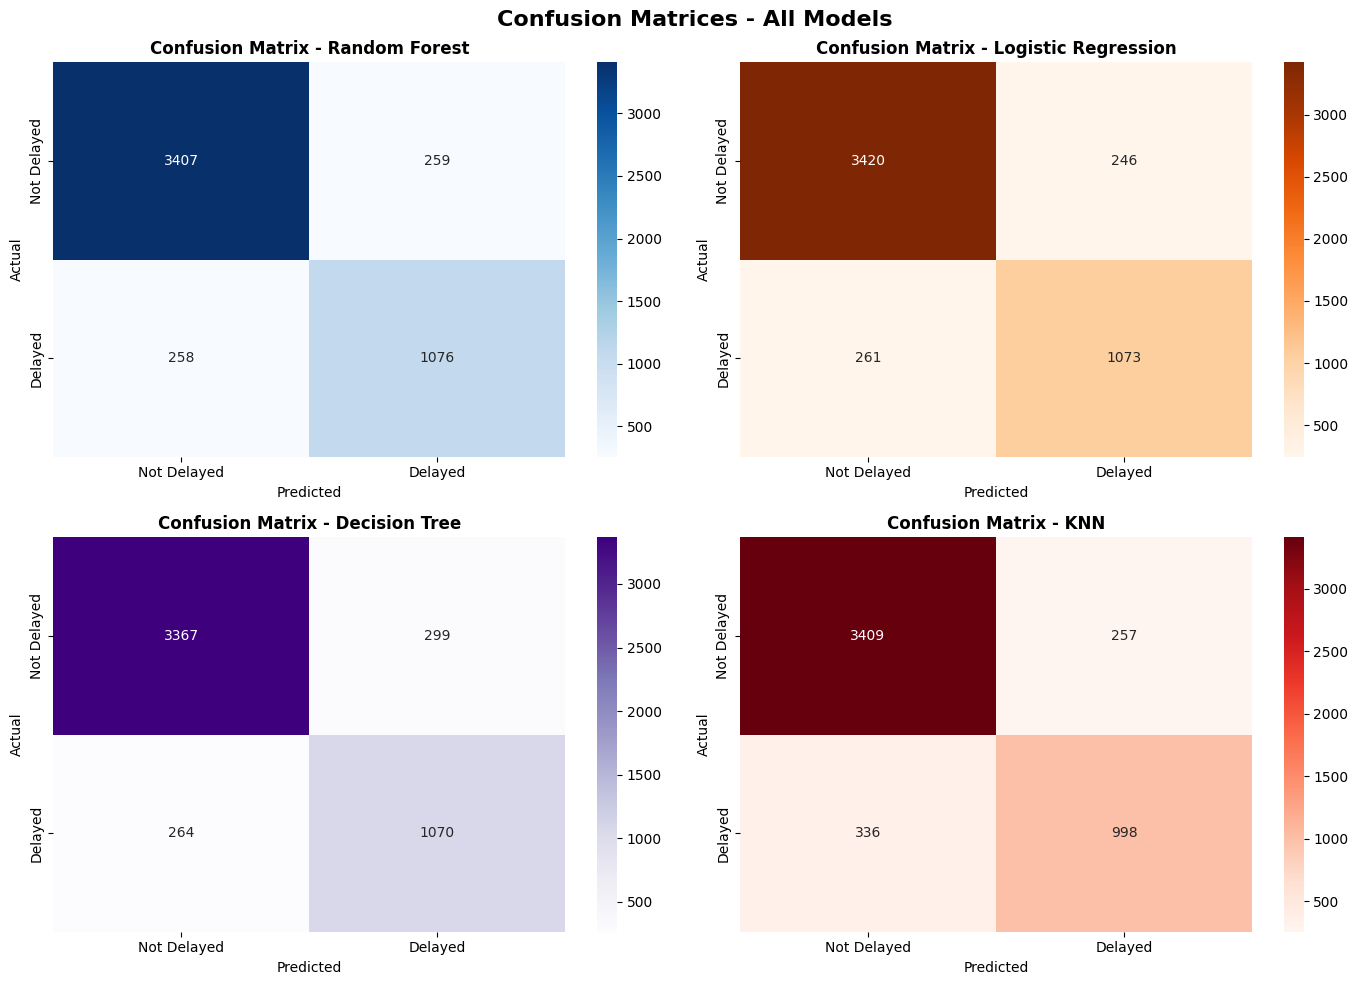

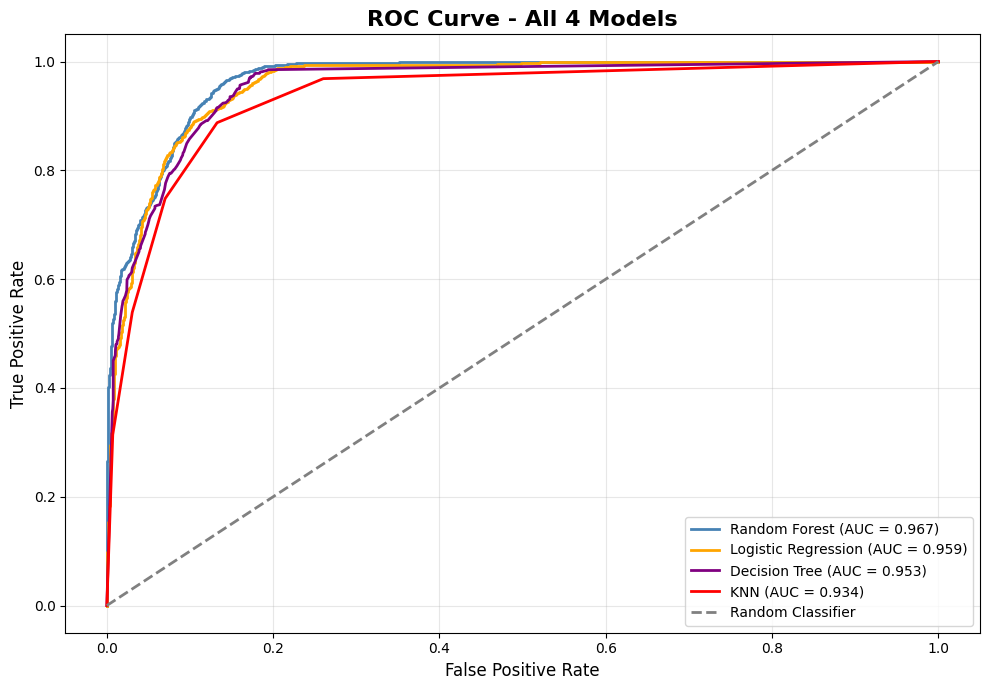

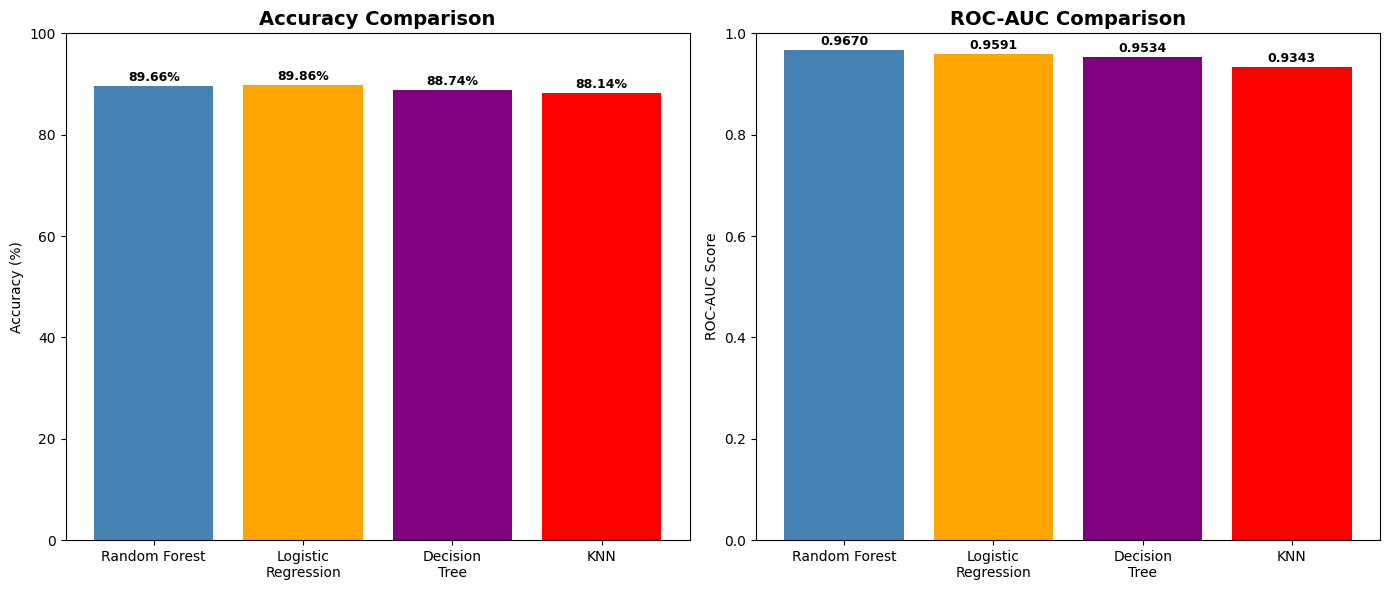

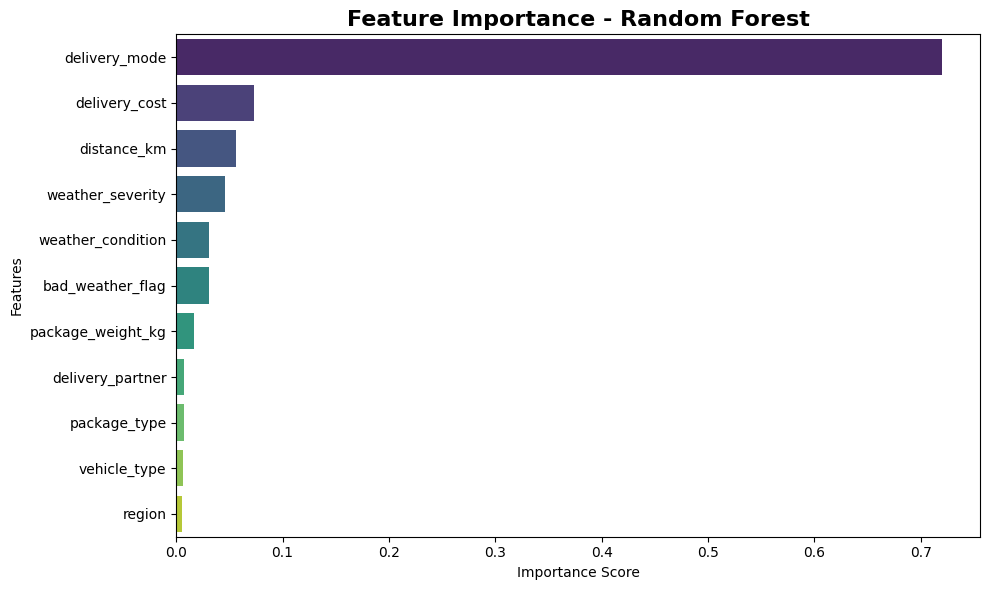


🏆 FINAL MODEL COMPARISON - ALL 4 MODELS
              Model Accuracy (%) ROC-AUC
      Random Forest        89.66  0.9670
Logistic Regression        89.86  0.9591
      Decision Tree        88.74  0.9534
                KNN        88.14  0.9343

🥇 Best by Accuracy: Logistic Regression (89.86%)
🥇 Best by ROC-AUC:  Random Forest (0.9670)

✅ All 4 models saved!
   - rf_delivery_model.pkl
   - lr_delivery_model.pkl
   - dt_delivery_model.pkl
   - knn_delivery_model.pkl
   - scaler.pkl
   - label_encoders.pkl


In [1]:
# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                              confusion_matrix, roc_auc_score, roc_curve)

# ============================================================
# STEP 1: LOAD DATA
# ============================================================
df = pd.read_csv("delivery_feature_engineered.csv")
print(f"✅ Dataset loaded! Shape: {df.shape}")

# ============================================================
# STEP 2: DROP LEAKAGE COLUMNS
# ============================================================
columns_to_drop = [
    'delivery_id',
    'delayed_flag',
    'delayed',
    'delivery_status',
    'delivery_time_hours',
    'expected_time_hours',
    'delivery_rating',
    'mode_delay_rate',
    'partner_delay_rate',
    'region_delay_rate',
    'vehicle_delay_rate',
    'cost_per_km',
    'weight_per_km',
]

columns_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns_to_drop, axis=1)
y = df['delayed_flag']

print(f"\n✅ Features being used ({len(X.columns)}):")
print(X.columns.tolist())
print(f"\n🎯 Target distribution:")
print(y.value_counts())
print(f"Delay rate: {y.mean()*100:.2f}%")

# ============================================================
# STEP 3: ENCODE CATEGORICAL VARIABLES
# ============================================================
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"\n📝 Encoding: {categorical_cols}")

label_encoders = {}
X_encoded = X.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le

print("✅ Encoding done!")

# ============================================================
# STEP 4: TRAIN-TEST SPLIT (80-20)
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n✅ Split done!")
print(f"   Training: {X_train.shape[0]} samples")
print(f"   Testing:  {X_test.shape[0]} samples")

# ============================================================
# STEP 5: SCALE FEATURES
# ============================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print("\n✅ Features scaled!")

# ============================================================
# STEP 6: TRAIN ALL 4 MODELS
# ============================================================

# 1. Random Forest
print("\n🌲 Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)
print("✅ Random Forest done!")

# 2. Logistic Regression
print("\n📈 Training Logistic Regression...")
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=1.0
)
lr_model.fit(X_train_scaled, y_train)
print("✅ Logistic Regression done!")

# 3. Decision Tree
print("\n🌳 Training Decision Tree...")
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
dt_model.fit(X_train_scaled, y_train)
print("✅ Decision Tree done!")

# 4. KNN
print("\n👥 Training KNN...")
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean'
)
knn_model.fit(X_train_scaled, y_train)
print("✅ KNN done!")

# ============================================================
# STEP 7: PREDICTIONS - ALL 4 MODELS
# ============================================================
y_pred_rf  = rf_model.predict(X_test_scaled)
y_pred_lr  = lr_model.predict(X_test_scaled)
y_pred_dt  = dt_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)

y_proba_rf  = rf_model.predict_proba(X_test_scaled)[:, 1]
y_proba_lr  = lr_model.predict_proba(X_test_scaled)[:, 1]
y_proba_dt  = dt_model.predict_proba(X_test_scaled)[:, 1]
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

print("\n✅ All predictions done!")

# ============================================================
# STEP 8: EVALUATE ALL 4 MODELS
# ============================================================
rf_acc  = accuracy_score(y_test, y_pred_rf)
lr_acc  = accuracy_score(y_test, y_pred_lr)
dt_acc  = accuracy_score(y_test, y_pred_dt)
knn_acc = accuracy_score(y_test, y_pred_knn)

rf_auc  = roc_auc_score(y_test, y_proba_rf)
lr_auc  = roc_auc_score(y_test, y_proba_lr)
dt_auc  = roc_auc_score(y_test, y_proba_dt)
knn_auc = roc_auc_score(y_test, y_proba_knn)

print("\n" + "="*60)
print("🌲 RANDOM FOREST")
print("="*60)
print(f"Accuracy: {rf_acc*100:.2f}% | ROC-AUC: {rf_auc:.4f}")
print(classification_report(y_test, y_pred_rf, target_names=['Not Delayed', 'Delayed']))

print("="*60)
print("📈 LOGISTIC REGRESSION")
print("="*60)
print(f"Accuracy: {lr_acc*100:.2f}% | ROC-AUC: {lr_auc:.4f}")
print(classification_report(y_test, y_pred_lr, target_names=['Not Delayed', 'Delayed']))

print("="*60)
print("🌳 DECISION TREE")
print("="*60)
print(f"Accuracy: {dt_acc*100:.2f}% | ROC-AUC: {dt_auc:.4f}")
print(classification_report(y_test, y_pred_dt, target_names=['Not Delayed', 'Delayed']))

print("="*60)
print("👥 KNN")
print("="*60)
print(f"Accuracy: {knn_acc*100:.2f}% | ROC-AUC: {knn_auc:.4f}")
print(classification_report(y_test, y_pred_knn, target_names=['Not Delayed', 'Delayed']))

# ============================================================
# STEP 9: CONFUSION MATRICES - ALL 4
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

models_info = [
    (y_pred_rf,  'Random Forest',       'Blues'),
    (y_pred_lr,  'Logistic Regression', 'Oranges'),
    (y_pred_dt,  'Decision Tree',       'Purples'),
    (y_pred_knn, 'KNN',                 'Reds'),
]

for i, (y_pred, title, cmap) in enumerate(models_info):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[i],
                xticklabels=['Not Delayed', 'Delayed'],
                yticklabels=['Not Delayed', 'Delayed'])
    axes[i].set_title(f'Confusion Matrix - {title}', fontweight='bold')
    axes[i].set_ylabel('Actual')
    axes[i].set_xlabel('Predicted')

plt.suptitle('Confusion Matrices - All Models', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================
# STEP 10: ROC CURVE - ALL 4 MODELS
# ============================================================
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_proba_rf)
fpr_lr,  tpr_lr,  _ = roc_curve(y_test, y_proba_lr)
fpr_dt,  tpr_dt,  _ = roc_curve(y_test, y_proba_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)

plt.figure(figsize=(10, 7))
plt.plot(fpr_rf,  tpr_rf,  color='steelblue', lw=2, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(fpr_lr,  tpr_lr,  color='orange',    lw=2, label=f'Logistic Regression (AUC = {lr_auc:.3f})')
plt.plot(fpr_dt,  tpr_dt,  color='purple',    lw=2, label=f'Decision Tree (AUC = {dt_auc:.3f})')
plt.plot(fpr_knn, tpr_knn, color='red',       lw=2, label=f'KNN (AUC = {knn_auc:.3f})')
plt.plot([0, 1],  [0, 1],  color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - All 4 Models', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# STEP 11: COMPARISON BAR CHART
# ============================================================
all_models     = ['Random Forest', 'Logistic\nRegression', 'Decision\nTree', 'KNN']
all_accuracies = [rf_acc*100, lr_acc*100, dt_acc*100, knn_acc*100]
all_roc_aucs   = [rf_auc, lr_auc, dt_auc, knn_auc]
all_colors     = ['steelblue', 'orange', 'purple', 'red']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(all_models, all_accuracies, color=all_colors)
axes[0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_ylim([0, 100])
for i, v in enumerate(all_accuracies):
    axes[0].text(i, v + 1, f'{v:.2f}%', ha='center', fontweight='bold', fontsize=9)

axes[1].bar(all_models, all_roc_aucs, color=all_colors)
axes[1].set_title('ROC-AUC Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('ROC-AUC Score')
axes[1].set_ylim([0, 1])
for i, v in enumerate(all_roc_aucs):
    axes[1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================
# STEP 12: FEATURE IMPORTANCE (RANDOM FOREST)
# ============================================================
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance - Random Forest', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# ============================================================
# STEP 13: SUMMARY TABLE
# ============================================================
summary = pd.DataFrame({
    'Model':        ['Random Forest', 'Logistic Regression', 'Decision Tree', 'KNN'],
    'Accuracy (%)': [f"{v:.2f}" for v in all_accuracies],
    'ROC-AUC':      [f"{v:.4f}" for v in all_roc_aucs]
})

print("\n🏆 FINAL MODEL COMPARISON - ALL 4 MODELS")
print("="*50)
print(summary.to_string(index=False))

best_acc_idx = all_accuracies.index(max(all_accuracies))
best_auc_idx = all_roc_aucs.index(max(all_roc_aucs))
print(f"\n🥇 Best by Accuracy: {summary['Model'][best_acc_idx]} ({max(all_accuracies):.2f}%)")
print(f"🥇 Best by ROC-AUC:  {summary['Model'][best_auc_idx]} ({max(all_roc_aucs):.4f})")

# ============================================================
# STEP 14: SAVE ALL MODELS
# ============================================================
with open('rf_delivery_model.pkl',  'wb') as f: pickle.dump(rf_model,       f)
with open('lr_delivery_model.pkl',  'wb') as f: pickle.dump(lr_model,       f)
with open('dt_delivery_model.pkl',  'wb') as f: pickle.dump(dt_model,       f)
with open('knn_delivery_model.pkl', 'wb') as f: pickle.dump(knn_model,      f)
with open('scaler.pkl',             'wb') as f: pickle.dump(scaler,         f)
with open('label_encoders.pkl',     'wb') as f: pickle.dump(label_encoders, f)

print("\n✅ All 4 models saved!")
print("   - rf_delivery_model.pkl")
print("   - lr_delivery_model.pkl")
print("   - dt_delivery_model.pkl")
print("   - knn_delivery_model.pkl")
print("   - scaler.pkl")
print("   - label_encoders.pkl")